### Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import time
import random
import copy
import os
import sys
import circuits

from scipy import interp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_score,accuracy_score, f1_score, recall_score, hamming_loss
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import callbacks
from keras.wrappers.scikit_learn import KerasRegressor
from keras import backend as K

from collections import defaultdict
from math import log2

print (pd.__version__)
RUN_CONFIGURATION_LOOP = False

Using TensorFlow backend.


1.0.3


C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Graph functions

In [2]:
def graph_with_errs_d3(df):
    x_data = []
    z_data = []
    
    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        if df.loc[i].at["X0"] == -1:
            x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["Z3"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["X6"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
        
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df
        

def graph_with_errs_d5(df):
    x_data = []
    z_data = []
    
    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        if df.loc[i].at["X0"] == -1:
             x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["X3"] == -1:
            x_data[i].append((0, -0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 0.5, 3.5))
        if df.loc[i].at["Z6"] == -1:
            z_data[i].append((0, 0.5, 4.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X8"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["Z9"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        if df.loc[i].at["X10"] == -1:
            x_data[i].append((0, 1.5, 2.5))
        if df.loc[i].at["Z11"] == -1:
            z_data[i].append((0, 1.5, 3.5))
        if df.loc[i].at["Z12"] == -1:
            z_data[i].append((0, 2.5, 0.5))
        if df.loc[i].at["X13"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z14"] == -1:
            z_data[i].append((0, 2.5, 2.5))
        if df.loc[i].at["X15"] == -1:
            x_data[i].append((0, 2.5, 3.5))
        if df.loc[i].at["Z16"] == -1:
            z_data[i].append((0, 2.5, 4.5))
        if df.loc[i].at["Z17"] == -1:
            z_data[i].append((0, 3.5, -0.5))
        if df.loc[i].at["X18"] == -1:
            x_data[i].append((0, 3.5, 0.5))
        if df.loc[i].at["X19"] == -1:
            x_data[i].append((0, 4.5, 1.5))
        if df.loc[i].at["Z20"] == -1:
            z_data[i].append((0, 3.5, 1.5))
        if df.loc[i].at["X21"] == -1:
            x_data[i].append((0, 3.5, 2.5))
        if df.loc[i].at["X22"] == -1:
            x_data[i].append((0, 4.5, 3.5))
        if df.loc[i].at["Z23"] == -1:
            z_data[i].append((0, 3.5, 3.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
            
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df


def graph_with_errs_d7(df):
    x_data = []
    z_data = []

    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        if df.loc[i].at["X0"] == -1:
            x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["X3"] == -1:
            x_data[i].append((0, -0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 0.5, 3.5))
        if df.loc[i].at["X6"] == -1:
            x_data[i].append((0, -0.5, 4.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 0.5, 4.5))
        if df.loc[i].at["X8"] == -1:
            x_data[i].append((0, 0.5, 5.5))
        if df.loc[i].at["Z9"] == -1:
            z_data[i].append((0, 0.5, 6.5))
        if df.loc[i].at["Z10"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X11"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["Z12"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        if df.loc[i].at["X13"] == -1:
            x_data[i].append((0, 1.5, 2.5))
        if df.loc[i].at["Z14"] == -1:
            z_data[i].append((0, 1.5, 3.5))
        if df.loc[i].at["X15"] == -1:
            x_data[i].append((0, 1.5, 4.5))
        if df.loc[i].at["Z16"] == -1:
            z_data[i].append((0, 1.5, 5.5))
        if df.loc[i].at["Z17"] == -1:
            z_data[i].append((0, 2.5, 0.5))
        if df.loc[i].at["X18"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z19"] == -1:
            z_data[i].append((0, 2.5, 2.5))
        if df.loc[i].at["X20"] == -1:
            x_data[i].append((0, 2.5, 3.5))
        if df.loc[i].at["Z21"] == -1:
            z_data[i].append((0, 2.5, 4.5))
        if df.loc[i].at["X22"] == -1:
            x_data[i].append((0, 2.5, 5.5))
        if df.loc[i].at["Z23"] == -1:
            z_data[i].append((0, 2.5, 6.5))
        if df.loc[i].at["Z24"] == -1:
            z_data[i].append((0, 3.5, -0.5))
        if df.loc[i].at["X25"] == -1:
            x_data[i].append((0, 3.5, 0.5))
        if df.loc[i].at["Z26"] == -1:
            z_data[i].append((0, 3.5, 1.5))
        if df.loc[i].at["X27"] == -1:
            x_data[i].append((0, 3.5, 2.5))
        if df.loc[i].at["Z28"] == -1:
            z_data[i].append((0, 3.5, 3.5))
        if df.loc[i].at["X29"] == -1:
            x_data[i].append((0, 3.5, 4.5))
        if df.loc[i].at["Z30"] == -1:
            z_data[i].append((0, 3.5, 5.5))
        if df.loc[i].at["Z31"] == -1:
            z_data[i].append((0, 4.5, 0.5))
        if df.loc[i].at["X32"] == -1:
            x_data[i].append((0, 4.5, 1.5))
        if df.loc[i].at["Z33"] == -1:
            z_data[i].append((0, 4.5, 2.5))
        if df.loc[i].at["X34"] == -1:
            x_data[i].append((0, 4.5, 3.5))
        if df.loc[i].at["Z35"] == -1:
            z_data[i].append((0, 4.5, 4.5))
        if df.loc[i].at["X36"] == -1:
            x_data[i].append((0, 4.5, 5.5))
        if df.loc[i].at["Z37"] == -1:
            z_data[i].append((0, 4.5, 6.5))
        if df.loc[i].at["Z38"] == -1:
            z_data[i].append((0, 5.5, -0.5))
        if df.loc[i].at["X39"] == -1:
            x_data[i].append((0, 5.5, 0.5))
        if df.loc[i].at["X40"] == -1:
            x_data[i].append((0, 6.5, 1.5))
        if df.loc[i].at["Z41"] == -1:
            z_data[i].append((0, 5.5, 1.5))
        if df.loc[i].at["X42"] == -1:
            x_data[i].append((0, 5.5, 2.5))
        if df.loc[i].at["X43"] == -1:
            x_data[i].append((0, 6.5, 3.5))
        if df.loc[i].at["Z44"] == -1:
            z_data[i].append((0, 5.5, 3.5))
        if df.loc[i].at["X45"] == -1:
            x_data[i].append((0, 5.5, 4.5))
        if df.loc[i].at["X46"] == -1:
            x_data[i].append((0, 6.5, 5.5))
        if df.loc[i].at["Z47"] == -1: 
            z_data[i].append((0, 5.5, 5.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
        
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df

### MWPM functions

In [3]:
def add_measurement_errs(curr_syn, prob_err, x_syn, depth):
    #x_syn is True if it is x syndrome, False if it is Z syndrome
    total_time = 0
    new_syn = []
    if x_syn:
        for i in curr_syn:
            rand = random.random()
            if rand > prob_err:
                new_syn.append(i)
        return (new_syn + return_xmeasurement_errs(depth, prob_err))
    else:
        for i in curr_syn:
            rand = random.random()
            if rand > prob_err:
                new_syn.append(i)
        return (new_syn + return_zmeasurement_errs(depth, prob_err))


def do_new_decoding(data, depth, prob_err):
    decoder = circuits.GraphDecoder(depth,1)
    G = decoder.S['Z']
    df = pd.DataFrame()
    syn = []
    total_time = 0
    
    for row in data:
        x_input = []
        z_input = []
        x_type = True
        for col in row:
            if not col == "[]":
                col = eval(col)
                for c in col:
                    if x_type:
                        x_input.append(c)
                    else:
                        z_input.append(c)
            x_type = not x_type  
            
        if prob_err > 0:
            syndromes_x = add_measurement_errs(x_input, prob_err, True, depth)
            syndromes_z = add_measurement_errs(z_input, prob_err, False, depth)
        else:
            syndromes_x = x_input
            syndromes_z = z_input

        start = time.time_ns()
        error_graph_x, paths_x = decoder.make_error_graph(syndromes_x,'X')
        matching_graph_x = decoder.matching_graph(error_graph_x,'X')
        matches_x = decoder.matching(matching_graph_x,'X')
        flips_x = decoder.calculate_qubit_flips(matches_x, paths_x,'X')
        syn_x = (translate_errors(flips_x))

        error_graph_z, paths_z = decoder.make_error_graph(syndromes_z,'Z')
        matching_graph_z = decoder.matching_graph(error_graph_z,'Z')
        matches_z = decoder.matching(matching_graph_z,'Z')
        flips_z = decoder.calculate_qubit_flips(matches_z, paths_z,'Z')
        syn_z = translate_errors(flips_z)
        df = df.append(pd.Series([syn_x, syn_z]), ignore_index=True)
        end = time.time_ns()
        total_time += (end - start)/ (10 ** 9)
    return (df, total_time) 


def return_xmeasurement_errs(depth, prob):
    
    new_errs = []
    
    if depth == 3:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, 1.5, 0.5), (0, 2.5, 1.5)]
    elif depth == 5:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, -0.5, 2.5), (0, 0.5, 3.5), (0, 1.5, 0.5), (0, 1.5, 2.5),
                        (0, 2.5, 1.5), (0, 2.5, 3.5), (0, 3.5, 0.5), (0, 4.5, 1.5), (0, 3.5, 2.5), (0, 4.5, 3.5)]
    else:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, -0.5, 2.5), (0, 0.5, 3.5), (0, -0.5, 4.5), (0, 0.5, 5.5),
                        (0, 1.5, 0.5), (0, 1.5, 2.5), (0, 1.5, 4.5), (0, 2.5, 1.5), (0, 2.5, 3.5), (0, 2.5, 5.5),
                        (0, 3.5, 0.5),  (0, 3.5, 2.5), (0, 3.5, 4.5), (0, 4.5, 1.5), (0, 4.5, 3.5), (0, 4.5, 5.5),
                       (0, 5.5, 0.5), (0, 6.5, 1.5), (0, 5.5, 2.5), (0, 6.5, 3.5), (0, 5.5, 4.5), (0, 6.5, 5.5)]
    for e in errs:
        rand = random.random()
        if rand <= prob:
            new_errs.append(e)
            
    return new_errs
            

def return_zmeasurement_errs(depth, prob):
    
    new_errs = []
    
    if depth == 3:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 1.5, -0.5), (0, 1.5, 1.5)]
    elif depth == 5:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 0.5, 4.5), (0, 1.5, -0.5), (0, 1.5, 1.5), (0, 1.5, 3.5),
                        (0, 2.5, 0.5), (0, 2.5, 2.5), (0, 2.5, 4.5), (0, 3.5, -0.5), (0, 3.5, 1.5), (0, 3.5, 3.5)]
    else:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 0.5, 4.5), (0, 0.5, 6.5), (0, 1.5, -0.5), (0, 1.5, 1.5),
                        (0, 1.5, 3.5), (0, 1.5, 5.5), (0, 2.5, 0.5), (0, 2.5, 2.5), (0, 2.5, 4.5), (0, 2.5, 6.5),
                        (0, 3.5, -0.5),  (0, 3.5, 1.5), (0, 3.5, 3.5), (0, 3.5, 5.5), (0, 4.5, 0.5), (0, 4.5, 2.5),
                       (0, 4.5, 4.5), (0, 4.5, 6.5), (0, 5.5, -0.5), (0, 5.5, 1.5), (0, 5.5, 3.5), (0, 5.5, 5.5)]
        
    for e in errs:
        rand = random.random()
        if rand <= prob:
            new_errs.append(e)
            
    return new_errs


def translate_errors (phys_errs):
    flipX = np.array([(0, 1),(1, 0)])
    flipZ = np.array([(1, 0), (0, -1)])
    errs = []
    str2 = ""
    for qubit, flip in phys_errs.items():
        row = int(qubit[1])
        col = int(qubit[2])
        if str(flip) == "X":
            str1 = "X"
        elif str(flip) == "Z":
            str1 = "Z"
        else:
            str1 = "X"
            str2 = "Z"
        str1 += str(row) + str(col)
        errs.append(str1)
        if str2 != "":
            str2 += str(row) +str(col)
            errs.append(str2)
            str2 = ""
    return errs   


def translate_to_graph(df_graph, labels, mlb):
#go through labels given
    indices = []
    labels = mlb.inverse_transform(labels)
    
    for row in labels:
        label_str = str(row)
        for index, r in df_graph.iterrows():
            if label_str == "('',)":
                if str(r["Labels"]) == "[' ']":
                    indices.append([index])
                    break
            if set(row) == set(r["Labels"]):
                indices.append([index])
                break

    df_syns = df_graph.drop(['Labels'], axis=1)
    return_df = pd.DataFrame()
    for i in indices:
        return_df = return_df.append(df_syns.loc[i])
    return return_df

### Preprocessing functions

In [4]:
def create_list_from_string(err_list):
    newstring = err_list.replace("'", "")
    new_err_list = newstring.strip('][').split(', ')
    return sorted(set(new_err_list))


def create_string_from_list(err_list):
    return_string = "["
    if err_list[0] == "''":
        return "[' ']"
    else:
        for index, i in enumerate(err_list):
            return_string = return_string +  "'" + i + "'"
            if index < (len(err_list)-1):
                return_string += ", "
    return return_string + "]"
        

#take in two 2d arrays of predicted values, true values, and threshold to determine labels. 
#calculates the partial accuracy of the predicted values, averaged out for all obersvations
def partial_accuracy(y_pred, y_true):
    total = 0
    rows = y_pred.shape[0]
    cols = y_pred.shape[1]
    for i in range(0, rows):
        row_correct = 0
        for j in range(0, cols):
            if y_pred[i,j] == y_true[i,j]:
                row_correct += 1
        total += row_correct/cols
    return total/rows


def partial_accuracy_and_contingency(y_pred, y_true, mlb):
    total = 0
    a= np.zeros(shape=y_true.shape)
    rows = y_pred.shape[0]
    cols = y_pred.shape[1]
    df = pd.DataFrame(a, columns = mlb.classes_)
    for i in range(0, rows):
        row_correct = 0
        for j, label in enumerate(mlb.classes_):
            if y_pred[i,j] == y_true[i,j]:
                row_correct += 1
                df.at[i, label] = 1
            else:
                df.at[i, label] = 0

        total += row_correct/cols

    return (total/rows, df)


def contingency_table_and_t (clf1, clf2):
    a = 0 #clf1 pos, clf2 pos
    b = 0 #clf1 pos, clf2 neg
    c = 0 #clf1 neg, clf2 pos
    d = 0 #clf1 neg, clf2 neg
    
    for index, value in clf1.items():
        if value == 1 and clf2[index] == 1:
            a+=1
        elif value == 1 and clf2[index] == 0: #classifier 1 right, classifier 2 wrong
            b+=1
        elif value == 0 and clf2[index] == 1: #classifier 1 wrong, classifier 2 right
            c+=1
        else:
            d+=1
    print("["+str(a)+", "+str(b)+"]")
    print("["+str(c)+", "+str(d)+"]")
    if b == 0 and c ==0:
        print("both b and c are zero")
        t=0
    else:
        t = (((b-c)-1)**2)/(b+c)
    return ([[a,b],[c,d]], t)


def add_noise(val, noise_level):
    rand = random.uniform(0, 1)
    if rand <= noise_level:
        if val == -1:
            val = 1
        elif val == 1:
            val = -1
    return val

### Lookup table functions

In [5]:
def generateAllBinaryStrings(n, arr, i, lookup):  
    if i == n: 
        lookup.setBitStringArray(arr, n)  
        return
      
    # First assign "0" at ith position  
    # and try for all other permutations  
    # for remaining positions  
    arr[i] = 0
    generateAllBinaryStrings(n, arr, i + 1, lookup)  
  
    # And then assign "1" at ith position  , 
    # and try for all other permutations  
    # for remaining positions  
    arr[i] = 1
    generateAllBinaryStrings(n, arr, i + 1, lookup)


class lookup_decoder:
    
    def __init__(self, depth):
        #self.lookupTable = defaultdict()
        self.lookupTable = {}
        self.distributions = {}
        self.depth = depth
        #generating all possible syndrome observations
        #arr = [None] * (depth**2 - 1)
        #generateAllBinaryStrings((depth**2 - 1), arr, 0, self)
        
    def setBitStringArray(self, arr, n): 
        new_str = ""
        for i in range(0, n):  
            new_str += str(arr[i])
        self.lookupTable.update({new_str:defaultdict()})  
        
    def update_table (self, syndrome, phys_errs):
        #all the keys are made in the init, so simply update the physical error combinations for the given syndrome
        if syndrome not in self.lookupTable:
            self.lookupTable[syndrome] = {}
            self.lookupTable[syndrome][phys_errs] = 1
            return
        
        if phys_errs not in self.lookupTable[syndrome]:
            self.lookupTable[syndrome].update({phys_errs: 1})
        else:
            self.lookupTable[syndrome][phys_errs] += 1
     
    def get_probable_error(self, syndrome):
        return_key = []

        if syndrome not in self.lookupTable.keys():
            for i in range(2* int(self.depth**2) + 1):
                return_key.append(0)
            return return_key
        
        key, value = max(self.lookupTable[syndrome].items(), key=lambda x:x[1])
        
        for character in key:
            if character == '0' or character == '1':
                return_key.append(int(character))
                
        return return_key
        
    def make_distribution_graph(self, syn):
        
        plt.bar(list(self.lookupTable[syn].keys()), self.lookupTable[syn].values(), color='g')
        plt.show()
        
    def syndrome_count_graph(self):
        graph_dict = {}
        for syn in self.lookupTable:
            graph_dict.update({syn:sum(self.lookupTable[syn].values())})
        plt.ylim((0,4))
        plt.bar(graph_dict.keys(), graph_dict.values())
        plt.show()
    
    def length_of_lookup(self):
        print(len(self.lookupTable))
            
    def get_entropies(self):
        entropies = {}
        for syn in self.lookupTable:
            total = sum(self.lookupTable[syn].values())
            h = 0
            for key in self.lookupTable[syn]:
                p = self.lookupTable[syn][key]/total
                h += p+log2(p)
            entropies[syn] = -h
        print(entropies)
            
    def get_syndromes(self):
        return self.lookupTable.keys()
                     
    def print_lookup(self):
        for syn in self.lookupTable:
            print(self.lookupTable[syn])
            

def train_plut(table, data_x, data_y):
    i = 0
    for index, x in enumerate(data_x):
        syn = "".join([str(i) for i in x])
        syn = syn.replace(".0","")
        labels = np.array2string(np.array(data_y[i]), precision=1, separator='',suppress_small=True).replace("[","").replace("]","")
        table.update_table(syn, labels)
        i+=1
    return table


def test_plut(table, test_set):
    predictions_lookup = []
    for index, x in enumerate(test_set):
        syn_x = "".join([str(i) for i in x])
        syn_x = syn_x.replace(".0","")
        predictions_lookup.append(table.get_probable_error(syn_x))
    return np.array(predictions_lookup)

### Model compilation functions

In [6]:
def compile_FFNN_model_DepthThree(depth):
    model = Sequential()
    layers = 4
    
    model.add(Dense(8, activation='relu'))
    
    for i in range(layers):
        model.add(Dense(32, activation='relu'))
    
    model.add(Dense(18 , activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(lr=0.05),
                  metrics=['accuracy'])
    return model


def compile_FFNN_cv_model_DepthThree(depth):
    model = Sequential()
    layers = 4

    model.add(Dense(8, activation='relu'))
    
    for i in range(layers):
        model.add(Dense(32, activation='relu'))
    
    model.add(Dense(19 , activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(lr=0.05),
                  metrics=['accuracy'])
    return model


def compile_FFNN_cv_model_DepthFive(depth):
    model = Sequential()
    layers = 4
    
    model.add(Dense(24, activation='relu'))
    
    for i in range(layers):
        model.add(Dense(240, activation='relu'))
    
    model.add(Dense(51, activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.05),
                  metrics=['accuracy'])
    return model


def compile_FFNN_cv_model_DepthSeven(depth):
    model = Sequential()
    layers = 4
    
    model.add(Dense(48, activation='relu'))
    
    for i in range(layers):
        model.add(Dense(400, activation='relu'))
    
    model.add(Dense(99, activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.05),
                  metrics=['accuracy'])
    return model

# D3 Training, Testing, and Cross-Validation

### Format data sets from CSV

#### Data sets for D3:
* Original:
    - "depth3_all_combos.csv"
* Exhaustive:
    - "ex-samples-d3.csv"
* Randomly-sampled, with replacement (version 2):
    - "v2samples-d3-1000.csv"
    - "v2samples-d3-10000.csv"
* Randomly-sampled, without replacement (version 3):
    - "v3samples-d3-1000.csv"
    - "v3samples-d3-10000.csv"

In [60]:
trainData_d3 = pd.read_csv("SAMPLES/v2samples-d3-10000.csv")

trainData_d3["Labels"] = trainData_d3['Labels'].map(lambda x: create_list_from_string(x))
trainData_d3 = trainData_d3.applymap(lambda x: add_noise(x,.01))

testData_d3_MWPM = graph_with_errs_d3(trainData_d3)

mlb_d3 = MultiLabelBinarizer()
mlb_d3.fit(trainData_d3["Labels"])
df = pd.DataFrame(mlb_d3.transform(trainData_d3['Labels']))
df['Labels']= df.values.tolist()
trainData_d3 = trainData_d3.drop(['Labels'], axis=1)
trainData_d3 = pd.concat([df['Labels'], testData_d3_MWPM, trainData_d3], axis=1, ignore_index=True)
trainData_d3.columns = ["Labels","XSyn", "ZSyn", "X0", "Z1", "X2", "Z3", "Z4", "X5", "X6", "Z7"]

y_d3 = trainData_d3["Labels"]
x_d3 = trainData_d3.drop(["Labels"], axis=1)

x_d3 = x_d3.replace([-1], 0)

### Fit model on training data

In [61]:
inputs = x_d3.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d3.copy()
targets = np.array([np.array(xi) for xi in targets])

train_input_d3 = inputs[:,2:]
train_output_d3 = targets[:,1:]

x_train_d3, x_test_d3, Y_train_d3, Y_test_d3 = train_test_split(train_input_d3, train_output_d3, train_size=0.75, shuffle=True)

model = compile_FFNN_model_DepthThree(3)
print("Fit model on training data")
history = model.fit(
    x=x_train_d3,
    y=Y_train_d3,
    validation_split=.25,
    epochs=200
)
model.summary()

Fit model on training data
Train on 5625 samples, validate on 1875 samples
Epoch 1/200
5625/5625 [==============================] - 0s 55us/step - loss: 0.5735 - accuracy: 0.8068 - val_loss: 0.3146 - val_accuracy: 0.9179
Epoch 2/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.2920 - accuracy: 0.9159 - val_loss: 0.2825 - val_accuracy: 0.9179
Epoch 3/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.2863 - accuracy: 0.9159 - val_loss: 0.2813 - val_accuracy: 0.9179
Epoch 4/200
5625/5625 [==============================] - 0s 36us/step - loss: 0.2856 - accuracy: 0.9159 - val_loss: 0.2808 - val_accuracy: 0.9179
Epoch 5/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.2852 - accuracy: 0.9159 - val_loss: 0.2804 - val_accuracy: 0.9179
Epoch 6/200
5625/5625 [==============================] - 0s 33us/step - loss: 0.2848 - accuracy: 0.9159 - val_loss: 0.2800 - val_accuracy: 0.9179
Epoch 7/200
5625/5625 [==========================

5625/5625 [==============================] - 0s 33us/step - loss: 0.1981 - accuracy: 0.9274 - val_loss: 0.1893 - val_accuracy: 0.9303
Epoch 57/200
5625/5625 [==============================] - 0s 32us/step - loss: 0.1965 - accuracy: 0.9278 - val_loss: 0.1885 - val_accuracy: 0.9289
Epoch 58/200
5625/5625 [==============================] - 0s 32us/step - loss: 0.1950 - accuracy: 0.9278 - val_loss: 0.1865 - val_accuracy: 0.9310
Epoch 59/200
5625/5625 [==============================] - 0s 31us/step - loss: 0.1935 - accuracy: 0.9287 - val_loss: 0.1847 - val_accuracy: 0.9308
Epoch 60/200
5625/5625 [==============================] - 0s 31us/step - loss: 0.1921 - accuracy: 0.9291 - val_loss: 0.1830 - val_accuracy: 0.9329
Epoch 61/200
5625/5625 [==============================] - 0s 33us/step - loss: 0.1906 - accuracy: 0.9295 - val_loss: 0.1833 - val_accuracy: 0.9309
Epoch 62/200
5625/5625 [==============================] - 0s 33us/step - loss: 0.1893 - accuracy: 0.9303 - val_loss: 0.1812 - val_a

Epoch 112/200
5625/5625 [==============================] - 0s 32us/step - loss: 0.1668 - accuracy: 0.9375 - val_loss: 0.1599 - val_accuracy: 0.9400
Epoch 113/200
5625/5625 [==============================] - 0s 31us/step - loss: 0.1665 - accuracy: 0.9376 - val_loss: 0.1600 - val_accuracy: 0.9399
Epoch 114/200
5625/5625 [==============================] - 0s 31us/step - loss: 0.1665 - accuracy: 0.9378 - val_loss: 0.1587 - val_accuracy: 0.9409
Epoch 115/200
5625/5625 [==============================] - 0s 31us/step - loss: 0.1664 - accuracy: 0.9374 - val_loss: 0.1594 - val_accuracy: 0.9398
Epoch 116/200
5625/5625 [==============================] - 0s 32us/step - loss: 0.1662 - accuracy: 0.9373 - val_loss: 0.1584 - val_accuracy: 0.9401
Epoch 117/200
5625/5625 [==============================] - 0s 31us/step - loss: 0.1660 - accuracy: 0.9376 - val_loss: 0.1584 - val_accuracy: 0.9401
Epoch 118/200
5625/5625 [==============================] - 0s 31us/step - loss: 0.1658 - accuracy: 0.9376 - val_

5625/5625 [==============================] - 0s 33us/step - loss: 0.1590 - accuracy: 0.9384 - val_loss: 0.1536 - val_accuracy: 0.9416
Epoch 168/200
5625/5625 [==============================] - 0s 33us/step - loss: 0.1590 - accuracy: 0.9383 - val_loss: 0.1517 - val_accuracy: 0.9417
Epoch 169/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.1590 - accuracy: 0.9384 - val_loss: 0.1515 - val_accuracy: 0.9409
Epoch 170/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.1587 - accuracy: 0.9384 - val_loss: 0.1523 - val_accuracy: 0.9407
Epoch 171/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.1587 - accuracy: 0.9382 - val_loss: 0.1515 - val_accuracy: 0.9414
Epoch 172/200
5625/5625 [==============================] - 0s 33us/step - loss: 0.1585 - accuracy: 0.9382 - val_loss: 0.1513 - val_accuracy: 0.9416
Epoch 173/200
5625/5625 [==============================] - 0s 34us/step - loss: 0.1584 - accuracy: 0.9383 - val_loss: 0.1519 -

### Generate confusion matrix and F1 scores on test sets

              precision    recall  f1-score   support

           0       0.84      0.62      0.71       209
           1       0.87      0.78      0.82       194
           2       0.53      0.49      0.51       201
           3       0.40      0.46      0.43       177
           4       0.79      0.68      0.73       179
           5       0.36      0.07      0.11       151
           6       0.00      0.00      0.00       164
           7       0.65      0.83      0.73       138
           8       0.73      0.71      0.72       131
           9       0.39      0.65      0.49       125
          10       0.00      0.00      0.00       119
          11       0.45      0.74      0.56       103
          12       0.44      0.81      0.57       115
          13       0.66      0.75      0.70       124
          14       0.53      0.87      0.66       107
          15       0.56      0.98      0.71        93
          16       0.34      0.96      0.50        81
          17       0.00    

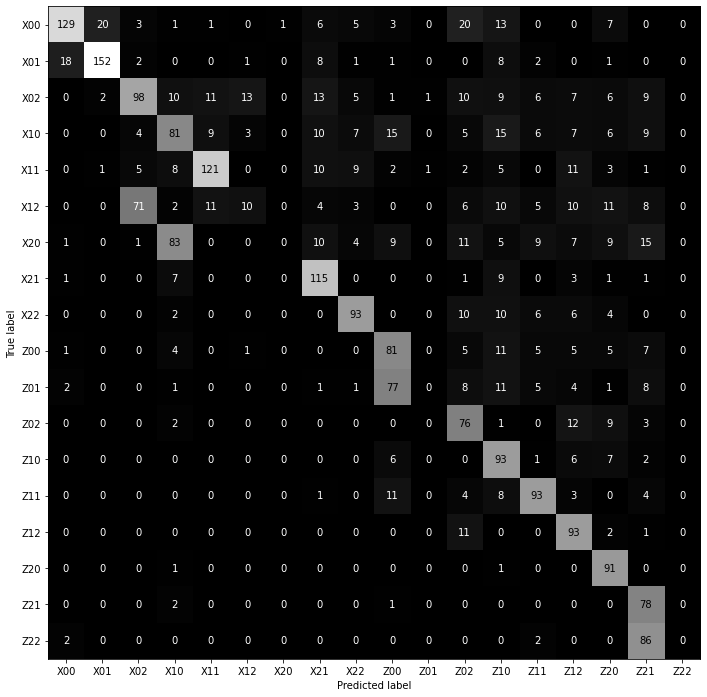

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt

predictions_d3 = model.predict(x_test_d3)

y_pred = np.argmax(predictions_d3, axis=1)
y_test = np.argmax(Y_test_d3, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['X00', 'X01', 'X02', 'X10', 'X11', 'X12', 'X20',
 'X21', 'X22','Z00', 'Z01', 'Z02', 'Z10', 'Z11', 'Z12', 
 'Z20', 'Z21', 'Z22'])
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax, values_format="d", cmap='gray')
disp.im_.colorbar.remove()
print( classification_report(y_test,y_pred))

### Display Epoch vs. Loss plot

Text(0, 0.5, 'Loss (MSE)')

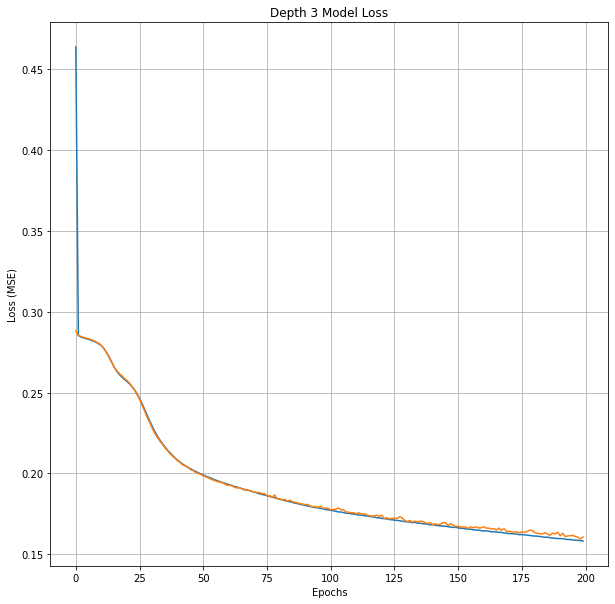

In [36]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 3 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

### Display Epoch vs. Accuracy plot

Text(0, 0.5, 'Accuracy')

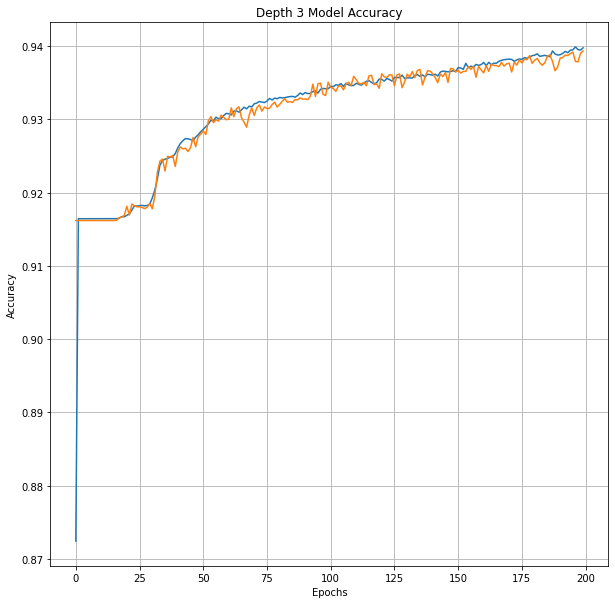

In [37]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 3 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

### Save model

In [32]:
model.save("model_d3_v3_1k.h5")

### K-fold cross validation

------------------------------------------------------------------------
Training for fold 1 ...
Train on 640 samples, validate on 160 samples
Epoch 1/200
640/640 [==============================] - 0s 205us/step - loss: 0.6785 - accuracy: 0.6663 - val_loss: 0.6698 - val_accuracy: 0.7099
Epoch 2/200
640/640 [==============================] - 0s 34us/step - loss: 0.6605 - accuracy: 0.7426 - val_loss: 0.6523 - val_accuracy: 0.7467
Epoch 3/200
640/640 [==============================] - 0s 36us/step - loss: 0.6408 - accuracy: 0.7656 - val_loss: 0.6322 - val_accuracy: 0.7638
Epoch 4/200
640/640 [==============================] - 0s 34us/step - loss: 0.6175 - accuracy: 0.7839 - val_loss: 0.6080 - val_accuracy: 0.7908
Epoch 5/200
640/640 [==============================] - 0s 31us/step - loss: 0.5884 - accuracy: 0.8033 - val_loss: 0.5776 - val_accuracy: 0.7984
Epoch 6/200
640/640 [==============================] - 0s 31us/step - loss: 0.5522 - accuracy: 0.8090 - val_loss: 0.5417 - val_accuracy:

640/640 [==============================] - 0s 36us/step - loss: 0.4218 - accuracy: 0.8441 - val_loss: 0.4418 - val_accuracy: 0.8339
Epoch 57/200
640/640 [==============================] - 0s 36us/step - loss: 0.4217 - accuracy: 0.8441 - val_loss: 0.4417 - val_accuracy: 0.8339
Epoch 58/200
640/640 [==============================] - 0s 36us/step - loss: 0.4216 - accuracy: 0.8441 - val_loss: 0.4416 - val_accuracy: 0.8339
Epoch 59/200
640/640 [==============================] - 0s 36us/step - loss: 0.4215 - accuracy: 0.8441 - val_loss: 0.4414 - val_accuracy: 0.8339
Epoch 60/200
640/640 [==============================] - 0s 33us/step - loss: 0.4213 - accuracy: 0.8441 - val_loss: 0.4413 - val_accuracy: 0.8339
Epoch 61/200
640/640 [==============================] - 0s 36us/step - loss: 0.4212 - accuracy: 0.8441 - val_loss: 0.4411 - val_accuracy: 0.8339
Epoch 62/200
640/640 [==============================] - 0s 34us/step - loss: 0.4211 - accuracy: 0.8441 - val_loss: 0.4410 - val_accuracy: 0.833

640/640 [==============================] - 0s 33us/step - loss: 0.4129 - accuracy: 0.8441 - val_loss: 0.4324 - val_accuracy: 0.8339
Epoch 113/200
640/640 [==============================] - 0s 33us/step - loss: 0.4126 - accuracy: 0.8441 - val_loss: 0.4322 - val_accuracy: 0.8339
Epoch 114/200
640/640 [==============================] - 0s 34us/step - loss: 0.4123 - accuracy: 0.8441 - val_loss: 0.4320 - val_accuracy: 0.8339
Epoch 115/200
640/640 [==============================] - 0s 36us/step - loss: 0.4121 - accuracy: 0.8441 - val_loss: 0.4315 - val_accuracy: 0.8339
Epoch 116/200
640/640 [==============================] - 0s 33us/step - loss: 0.4118 - accuracy: 0.8441 - val_loss: 0.4312 - val_accuracy: 0.8339
Epoch 117/200
640/640 [==============================] - 0s 34us/step - loss: 0.4115 - accuracy: 0.8441 - val_loss: 0.4310 - val_accuracy: 0.8339
Epoch 118/200
640/640 [==============================] - 0s 36us/step - loss: 0.4111 - accuracy: 0.8441 - val_loss: 0.4306 - val_accuracy:

640/640 [==============================] - 0s 34us/step - loss: 0.3885 - accuracy: 0.8456 - val_loss: 0.4109 - val_accuracy: 0.8349
Epoch 169/200
640/640 [==============================] - 0s 34us/step - loss: 0.3881 - accuracy: 0.8453 - val_loss: 0.4109 - val_accuracy: 0.8349
Epoch 170/200
640/640 [==============================] - 0s 34us/step - loss: 0.3878 - accuracy: 0.8459 - val_loss: 0.4104 - val_accuracy: 0.8352
Epoch 171/200
640/640 [==============================] - 0s 36us/step - loss: 0.3874 - accuracy: 0.8458 - val_loss: 0.4100 - val_accuracy: 0.8352
Epoch 172/200
640/640 [==============================] - 0s 34us/step - loss: 0.3871 - accuracy: 0.8459 - val_loss: 0.4097 - val_accuracy: 0.8352
Epoch 173/200
640/640 [==============================] - 0s 33us/step - loss: 0.3867 - accuracy: 0.8462 - val_loss: 0.4095 - val_accuracy: 0.8355
Epoch 174/200
640/640 [==============================] - 0s 34us/step - loss: 0.3864 - accuracy: 0.8459 - val_loss: 0.4095 - val_accuracy:

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


------------------------------------------------------------------------
Training for fold 2 ...
Train on 640 samples, validate on 161 samples
Epoch 1/200
640/640 [==============================] - 0s 202us/step - loss: 0.6865 - accuracy: 0.5959 - val_loss: 0.6789 - val_accuracy: 0.6535
Epoch 2/200
640/640 [==============================] - 0s 36us/step - loss: 0.6685 - accuracy: 0.7105 - val_loss: 0.6627 - val_accuracy: 0.7274
Epoch 3/200
640/640 [==============================] - 0s 36us/step - loss: 0.6511 - accuracy: 0.7517 - val_loss: 0.6458 - val_accuracy: 0.7414
Epoch 4/200
640/640 [==============================] - 0s 38us/step - loss: 0.6321 - accuracy: 0.7549 - val_loss: 0.6269 - val_accuracy: 0.7483
Epoch 5/200
640/640 [==============================] - 0s 39us/step - loss: 0.6100 - accuracy: 0.7663 - val_loss: 0.6042 - val_accuracy: 0.7587
Epoch 6/200
640/640 [==============================] - 0s 34us/step - loss: 0.5832 - accuracy: 0.7804 - val_loss: 0.5766 - val_accuracy:

640/640 [==============================] - 0s 34us/step - loss: 0.4228 - accuracy: 0.8435 - val_loss: 0.4435 - val_accuracy: 0.8339
Epoch 57/200
640/640 [==============================] - 0s 33us/step - loss: 0.4227 - accuracy: 0.8435 - val_loss: 0.4435 - val_accuracy: 0.8339
Epoch 58/200
640/640 [==============================] - 0s 36us/step - loss: 0.4226 - accuracy: 0.8435 - val_loss: 0.4434 - val_accuracy: 0.8339
Epoch 59/200
640/640 [==============================] - 0s 34us/step - loss: 0.4226 - accuracy: 0.8435 - val_loss: 0.4434 - val_accuracy: 0.8339
Epoch 60/200
640/640 [==============================] - 0s 36us/step - loss: 0.4225 - accuracy: 0.8435 - val_loss: 0.4433 - val_accuracy: 0.8339
Epoch 61/200
640/640 [==============================] - 0s 36us/step - loss: 0.4224 - accuracy: 0.8435 - val_loss: 0.4432 - val_accuracy: 0.8339
Epoch 62/200
640/640 [==============================] - 0s 34us/step - loss: 0.4223 - accuracy: 0.8435 - val_loss: 0.4432 - val_accuracy: 0.833

640/640 [==============================] - 0s 36us/step - loss: 0.4161 - accuracy: 0.8435 - val_loss: 0.4382 - val_accuracy: 0.8339
Epoch 113/200
640/640 [==============================] - 0s 34us/step - loss: 0.4159 - accuracy: 0.8435 - val_loss: 0.4379 - val_accuracy: 0.8339
Epoch 114/200
640/640 [==============================] - 0s 36us/step - loss: 0.4157 - accuracy: 0.8435 - val_loss: 0.4378 - val_accuracy: 0.8339
Epoch 115/200
640/640 [==============================] - 0s 34us/step - loss: 0.4155 - accuracy: 0.8435 - val_loss: 0.4377 - val_accuracy: 0.8339
Epoch 116/200
640/640 [==============================] - 0s 34us/step - loss: 0.4154 - accuracy: 0.8435 - val_loss: 0.4375 - val_accuracy: 0.8339
Epoch 117/200
640/640 [==============================] - 0s 34us/step - loss: 0.4152 - accuracy: 0.8435 - val_loss: 0.4375 - val_accuracy: 0.8339
Epoch 118/200
640/640 [==============================] - 0s 36us/step - loss: 0.4149 - accuracy: 0.8435 - val_loss: 0.4373 - val_accuracy:

640/640 [==============================] - 0s 33us/step - loss: 0.4025 - accuracy: 0.8435 - val_loss: 0.4288 - val_accuracy: 0.8339
Epoch 169/200
640/640 [==============================] - 0s 33us/step - loss: 0.4022 - accuracy: 0.8435 - val_loss: 0.4285 - val_accuracy: 0.8339
Epoch 170/200
640/640 [==============================] - 0s 34us/step - loss: 0.4019 - accuracy: 0.8435 - val_loss: 0.4283 - val_accuracy: 0.8339
Epoch 171/200
640/640 [==============================] - 0s 36us/step - loss: 0.4016 - accuracy: 0.8435 - val_loss: 0.4280 - val_accuracy: 0.8339
Epoch 172/200
640/640 [==============================] - 0s 34us/step - loss: 0.4014 - accuracy: 0.8435 - val_loss: 0.4279 - val_accuracy: 0.8339
Epoch 173/200
640/640 [==============================] - 0s 34us/step - loss: 0.4010 - accuracy: 0.8435 - val_loss: 0.4279 - val_accuracy: 0.8339
Epoch 174/200
640/640 [==============================] - 0s 38us/step - loss: 0.4008 - accuracy: 0.8437 - val_loss: 0.4278 - val_accuracy:

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 3 ...
Train on 640 samples, validate on 161 samples
Epoch 1/200
640/640 [==============================] - 0s 200us/step - loss: 0.6864 - accuracy: 0.6466 - val_loss: 0.6812 - val_accuracy: 0.7306
Epoch 2/200
640/640 [==============================] - 0s 33us/step - loss: 0.6757 - accuracy: 0.7516 - val_loss: 0.6709 - val_accuracy: 0.7656
Epoch 3/200
640/640 [==============================] - 0s 38us/step - loss: 0.6652 - accuracy: 0.7785 - val_loss: 0.6606 - val_accuracy: 0.7846
Epoch 4/200
640/640 [==============================] - 0s 38us/step - loss: 0.6545 - accuracy: 0.7901 - val_loss: 0.6500 - val_accuracy: 0.7891
Epoch 5/200
640/640 [==============================] - 0s 36us/step - loss: 0.6434 - accuracy: 0.7963 - val_loss: 0.6390 - val_accuracy: 0.7947
Epoch 6/200
640/640 [==============================] - 0s 38us/step - loss: 0.6316 - accuracy: 0.8007 - val_loss: 0.6272 - val_accuracy:

640/640 [==============================] - 0s 33us/step - loss: 0.4230 - accuracy: 0.8438 - val_loss: 0.4401 - val_accuracy: 0.8343
Epoch 57/200
640/640 [==============================] - 0s 36us/step - loss: 0.4230 - accuracy: 0.8438 - val_loss: 0.4400 - val_accuracy: 0.8343
Epoch 58/200
640/640 [==============================] - 0s 36us/step - loss: 0.4229 - accuracy: 0.8438 - val_loss: 0.4399 - val_accuracy: 0.8343
Epoch 59/200
640/640 [==============================] - 0s 36us/step - loss: 0.4228 - accuracy: 0.8438 - val_loss: 0.4398 - val_accuracy: 0.8343
Epoch 60/200
640/640 [==============================] - 0s 36us/step - loss: 0.4227 - accuracy: 0.8438 - val_loss: 0.4398 - val_accuracy: 0.8343
Epoch 61/200
640/640 [==============================] - 0s 38us/step - loss: 0.4226 - accuracy: 0.8438 - val_loss: 0.4397 - val_accuracy: 0.8343
Epoch 62/200
640/640 [==============================] - 0s 36us/step - loss: 0.4225 - accuracy: 0.8438 - val_loss: 0.4396 - val_accuracy: 0.834

640/640 [==============================] - 0s 34us/step - loss: 0.4159 - accuracy: 0.8438 - val_loss: 0.4342 - val_accuracy: 0.8343
Epoch 113/200
640/640 [==============================] - 0s 36us/step - loss: 0.4157 - accuracy: 0.8438 - val_loss: 0.4341 - val_accuracy: 0.8343
Epoch 114/200
640/640 [==============================] - 0s 38us/step - loss: 0.4155 - accuracy: 0.8438 - val_loss: 0.4339 - val_accuracy: 0.8343
Epoch 115/200
640/640 [==============================] - 0s 38us/step - loss: 0.4153 - accuracy: 0.8438 - val_loss: 0.4338 - val_accuracy: 0.8343
Epoch 116/200
640/640 [==============================] - 0s 36us/step - loss: 0.4151 - accuracy: 0.8438 - val_loss: 0.4336 - val_accuracy: 0.8343
Epoch 117/200
640/640 [==============================] - 0s 36us/step - loss: 0.4149 - accuracy: 0.8437 - val_loss: 0.4334 - val_accuracy: 0.8343
Epoch 118/200
640/640 [==============================] - 0s 36us/step - loss: 0.4147 - accuracy: 0.8438 - val_loss: 0.4333 - val_accuracy:

640/640 [==============================] - 0s 34us/step - loss: 0.4056 - accuracy: 0.8448 - val_loss: 0.4259 - val_accuracy: 0.8346
Epoch 169/200
640/640 [==============================] - 0s 34us/step - loss: 0.4054 - accuracy: 0.8449 - val_loss: 0.4257 - val_accuracy: 0.8343
Epoch 170/200
640/640 [==============================] - 0s 34us/step - loss: 0.4052 - accuracy: 0.8447 - val_loss: 0.4256 - val_accuracy: 0.8343
Epoch 171/200
640/640 [==============================] - 0s 36us/step - loss: 0.4051 - accuracy: 0.8447 - val_loss: 0.4255 - val_accuracy: 0.8346
Epoch 172/200
640/640 [==============================] - 0s 36us/step - loss: 0.4049 - accuracy: 0.8448 - val_loss: 0.4253 - val_accuracy: 0.8346
Epoch 173/200
640/640 [==============================] - 0s 36us/step - loss: 0.4048 - accuracy: 0.8449 - val_loss: 0.4252 - val_accuracy: 0.8343
Epoch 174/200
640/640 [==============================] - 0s 36us/step - loss: 0.4046 - accuracy: 0.8450 - val_loss: 0.4251 - val_accuracy:

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 4 ...
Train on 640 samples, validate on 161 samples
Epoch 1/200
640/640 [==============================] - 0s 231us/step - loss: 0.6852 - accuracy: 0.6414 - val_loss: 0.6778 - val_accuracy: 0.7306
Epoch 2/200
640/640 [==============================] - 0s 42us/step - loss: 0.6703 - accuracy: 0.7755 - val_loss: 0.6631 - val_accuracy: 0.8130
Epoch 3/200
640/640 [==============================] - 0s 39us/step - loss: 0.6544 - accuracy: 0.8310 - val_loss: 0.6467 - val_accuracy: 0.8316
Epoch 4/200
640/640 [==============================] - 0s 39us/step - loss: 0.6361 - accuracy: 0.8446 - val_loss: 0.6272 - val_accuracy: 0.8330
Epoch 5/200
640/640 [==============================] - 0s 38us/step - loss: 0.6135 - accuracy: 0.8450 - val_loss: 0.6026 - val_accuracy: 0.8330
Epoch 6/200
640/640 [==============================] - 0s 39us/step - loss: 0.5843 - accuracy: 0.8451 - val_loss: 0.5704 - val_accuracy:

640/640 [==============================] - 0s 34us/step - loss: 0.4211 - accuracy: 0.8451 - val_loss: 0.4433 - val_accuracy: 0.8330
Epoch 57/200
640/640 [==============================] - 0s 33us/step - loss: 0.4211 - accuracy: 0.8451 - val_loss: 0.4432 - val_accuracy: 0.8330
Epoch 58/200
640/640 [==============================] - 0s 36us/step - loss: 0.4210 - accuracy: 0.8451 - val_loss: 0.4432 - val_accuracy: 0.8330
Epoch 59/200
640/640 [==============================] - 0s 34us/step - loss: 0.4209 - accuracy: 0.8451 - val_loss: 0.4431 - val_accuracy: 0.8330
Epoch 60/200
640/640 [==============================] - 0s 36us/step - loss: 0.4208 - accuracy: 0.8451 - val_loss: 0.4430 - val_accuracy: 0.8330
Epoch 61/200
640/640 [==============================] - 0s 36us/step - loss: 0.4208 - accuracy: 0.8451 - val_loss: 0.4429 - val_accuracy: 0.8330
Epoch 62/200
640/640 [==============================] - 0s 34us/step - loss: 0.4207 - accuracy: 0.8451 - val_loss: 0.4428 - val_accuracy: 0.833

640/640 [==============================] - 0s 36us/step - loss: 0.4157 - accuracy: 0.8451 - val_loss: 0.4373 - val_accuracy: 0.8330
Epoch 113/200
640/640 [==============================] - 0s 34us/step - loss: 0.4155 - accuracy: 0.8451 - val_loss: 0.4371 - val_accuracy: 0.8330
Epoch 114/200
640/640 [==============================] - 0s 34us/step - loss: 0.4154 - accuracy: 0.8451 - val_loss: 0.4369 - val_accuracy: 0.8330
Epoch 115/200
640/640 [==============================] - 0s 36us/step - loss: 0.4152 - accuracy: 0.8451 - val_loss: 0.4367 - val_accuracy: 0.8330
Epoch 116/200
640/640 [==============================] - 0s 36us/step - loss: 0.4150 - accuracy: 0.8451 - val_loss: 0.4366 - val_accuracy: 0.8330
Epoch 117/200
640/640 [==============================] - 0s 33us/step - loss: 0.4148 - accuracy: 0.8451 - val_loss: 0.4364 - val_accuracy: 0.8330
Epoch 118/200
640/640 [==============================] - 0s 33us/step - loss: 0.4147 - accuracy: 0.8451 - val_loss: 0.4363 - val_accuracy:

640/640 [==============================] - 0s 34us/step - loss: 0.4028 - accuracy: 0.8453 - val_loss: 0.4251 - val_accuracy: 0.8343
Epoch 169/200
640/640 [==============================] - 0s 34us/step - loss: 0.4027 - accuracy: 0.8456 - val_loss: 0.4248 - val_accuracy: 0.8343
Epoch 170/200
640/640 [==============================] - 0s 34us/step - loss: 0.4024 - accuracy: 0.8452 - val_loss: 0.4247 - val_accuracy: 0.8343
Epoch 171/200
640/640 [==============================] - 0s 34us/step - loss: 0.4022 - accuracy: 0.8455 - val_loss: 0.4245 - val_accuracy: 0.8343
Epoch 172/200
640/640 [==============================] - 0s 36us/step - loss: 0.4020 - accuracy: 0.8455 - val_loss: 0.4244 - val_accuracy: 0.8343
Epoch 173/200
640/640 [==============================] - 0s 36us/step - loss: 0.4018 - accuracy: 0.8454 - val_loss: 0.4242 - val_accuracy: 0.8333
Epoch 174/200
640/640 [==============================] - 0s 33us/step - loss: 0.4015 - accuracy: 0.8454 - val_loss: 0.4239 - val_accuracy:

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 5 ...
Train on 640 samples, validate on 161 samples
Epoch 1/200
640/640 [==============================] - 0s 211us/step - loss: 0.6831 - accuracy: 0.6104 - val_loss: 0.6757 - val_accuracy: 0.6806
Epoch 2/200
640/640 [==============================] - 0s 33us/step - loss: 0.6677 - accuracy: 0.7025 - val_loss: 0.6607 - val_accuracy: 0.7195
Epoch 3/200
640/640 [==============================] - 0s 34us/step - loss: 0.6514 - accuracy: 0.7354 - val_loss: 0.6441 - val_accuracy: 0.7434
Epoch 4/200
640/640 [==============================] - 0s 36us/step - loss: 0.6325 - accuracy: 0.7604 - val_loss: 0.6239 - val_accuracy: 0.7636
Epoch 5/200
640/640 [==============================] - 0s 36us/step - loss: 0.6086 - accuracy: 0.7850 - val_loss: 0.5979 - val_accuracy: 0.7872
Epoch 6/200
640/640 [==============================] - 0s 36us/step - loss: 0.5772 - accuracy: 0.8183 - val_loss: 0.5642 - val_accuracy:

640/640 [==============================] - 0s 36us/step - loss: 0.4212 - accuracy: 0.8450 - val_loss: 0.4414 - val_accuracy: 0.8349
Epoch 57/200
640/640 [==============================] - 0s 34us/step - loss: 0.4211 - accuracy: 0.8450 - val_loss: 0.4414 - val_accuracy: 0.8349
Epoch 58/200
640/640 [==============================] - 0s 34us/step - loss: 0.4211 - accuracy: 0.8450 - val_loss: 0.4413 - val_accuracy: 0.8349
Epoch 59/200
640/640 [==============================] - 0s 34us/step - loss: 0.4210 - accuracy: 0.8450 - val_loss: 0.4413 - val_accuracy: 0.8349
Epoch 60/200
640/640 [==============================] - 0s 34us/step - loss: 0.4209 - accuracy: 0.8450 - val_loss: 0.4412 - val_accuracy: 0.8349
Epoch 61/200
640/640 [==============================] - 0s 36us/step - loss: 0.4209 - accuracy: 0.8450 - val_loss: 0.4411 - val_accuracy: 0.8349
Epoch 62/200
640/640 [==============================] - 0s 38us/step - loss: 0.4208 - accuracy: 0.8450 - val_loss: 0.4410 - val_accuracy: 0.834

640/640 [==============================] - 0s 33us/step - loss: 0.4160 - accuracy: 0.8450 - val_loss: 0.4356 - val_accuracy: 0.8349
Epoch 113/200
640/640 [==============================] - 0s 34us/step - loss: 0.4158 - accuracy: 0.8450 - val_loss: 0.4355 - val_accuracy: 0.8349
Epoch 114/200
640/640 [==============================] - 0s 34us/step - loss: 0.4157 - accuracy: 0.8450 - val_loss: 0.4352 - val_accuracy: 0.8349
Epoch 115/200
640/640 [==============================] - 0s 34us/step - loss: 0.4155 - accuracy: 0.8450 - val_loss: 0.4350 - val_accuracy: 0.8349
Epoch 116/200
640/640 [==============================] - 0s 34us/step - loss: 0.4153 - accuracy: 0.8450 - val_loss: 0.4348 - val_accuracy: 0.8349
Epoch 117/200
640/640 [==============================] - 0s 34us/step - loss: 0.4151 - accuracy: 0.8450 - val_loss: 0.4346 - val_accuracy: 0.8349
Epoch 118/200
640/640 [==============================] - 0s 36us/step - loss: 0.4149 - accuracy: 0.8450 - val_loss: 0.4345 - val_accuracy:

640/640 [==============================] - 0s 33us/step - loss: 0.4029 - accuracy: 0.8450 - val_loss: 0.4223 - val_accuracy: 0.8349
Epoch 169/200
640/640 [==============================] - 0s 36us/step - loss: 0.4028 - accuracy: 0.8450 - val_loss: 0.4221 - val_accuracy: 0.8349
Epoch 170/200
640/640 [==============================] - 0s 36us/step - loss: 0.4026 - accuracy: 0.8450 - val_loss: 0.4220 - val_accuracy: 0.8349
Epoch 171/200
640/640 [==============================] - 0s 36us/step - loss: 0.4024 - accuracy: 0.8450 - val_loss: 0.4218 - val_accuracy: 0.8349
Epoch 172/200
640/640 [==============================] - 0s 36us/step - loss: 0.4023 - accuracy: 0.8451 - val_loss: 0.4216 - val_accuracy: 0.8349
Epoch 173/200
640/640 [==============================] - 0s 38us/step - loss: 0.4021 - accuracy: 0.8451 - val_loss: 0.4214 - val_accuracy: 0.8349
Epoch 174/200
640/640 [==============================] - 0s 34us/step - loss: 0.4020 - accuracy: 0.8451 - val_loss: 0.4213 - val_accuracy:

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


<Figure size 720x720 with 0 Axes>

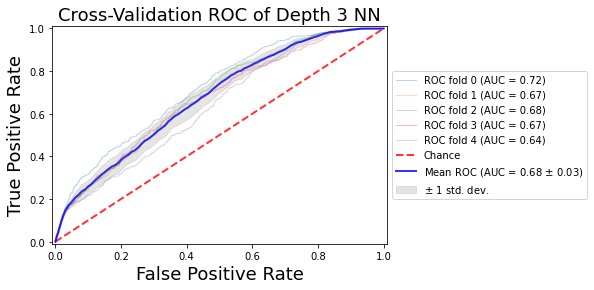

In [33]:
kfold = KFold(n_splits=5, shuffle=True)
inputs = x_d3.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d3.copy()
targets = np.array([np.array(xi) for xi in targets])

n_classes = 19

acc_per_fold = []
f1_per_fold = []
time_per_fold = []


acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb_d3.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    x_test_d3 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    
    ####################################################################################################
    #test MWPM decoder for this fold
    
    decoding_d3, time_mwpm = do_new_decoding(x_test_d3, 3, .03)
    decoding_d3['combine'] = decoding_d3[[0, 1]].values.tolist()
    decoding_d3['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d3 = np.array(decoding_d3[0])

    time_per_fold_mwpm.append(time_mwpm)

    pred_mwpm = mlb_d3.transform(decoding_d3)
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets[test], pred_mwpm, mlb_d3)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets[test], pred_mwpm, average='micro'))


    #####################################################################################################
    #test the plut decoder for this fold

    lookup_d3 = lookup_decoder(3)

    lookup_d3 = train_plut(lookup_d3, inputs_train, targets[train])

    start = time.time_ns()
    pred_plut_d3 = test_plut(lookup_d3, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_plut_d3)
    else:
        acc, contingency_plut = partial_accuracy_and_contingency(targets[test], pred_plut_d3, mlb_d3)

    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1_score(targets[test], pred_plut_d3, average='micro'))

    #####################################################################################################
    #Test the NN decoder for this fold

    model = compile_FFNN_cv_model_DepthThree(3)
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model

    history = model.fit(
        inputs_train, targets[train],
        validation_split=.2,
        epochs=200,
        verbose=1)

   # Generate generalization metrics
    scores = model.evaluate(inputs_test, targets[test], verbose=0)

    #get the time to predicting test
    start = time.time_ns()
    predictions_d3 = model.predict(inputs_test) #change here
    end = time.time_ns()
    time_per_fold.append((end - start)/ (10 ** 9))

    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d3.copy() #change here
    pred[pred>=.1]=1 
    pred[pred<.1]=0
    
    if fold_no <5:
        acc = scores[1]
    else:
        acc, contingency_nn = partial_accuracy_and_contingency(targets[test], pred, mlb_d3)

    acc_per_fold.append(acc)
    f1_per_fold.append(f1_score(targets[test], pred, average='micro'))

    #####################################################################################################
    #comput ROC AUC for classes and the mircoaverage
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d3.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d3[:, i]) #change here
        aucs_classes[mlb_d3.classes_[i]].append(auc(fpr[i], tpr[i]))
        
    # Increase fold number
    fold_no = fold_no + 1
        
#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d3.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
    
############print mean and stdev of AUC of each class#####################      
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print("#####################################################################################")
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print("#####################################################################################")
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
print("#####################################################################################")
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 3 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# D5 Training, Testing, and Cross-Validation

### Format data sets from CSV

#### Data sets for D5:
* Original:
    - "depth5_all_combos.csv"
* Randomly-sampled, with replacement (version 2):
    - "v2samples-d5-1000.csv"
    - "v2samples-d5-10000.csv"
* Randomly-sampled, without replacement (version 3):
    - "v3samples-d5-1000.csv"
    - "v3samples-d5-10000.csv"

In [38]:
trainData_d5 = pd.read_csv("SAMPLES/v2samples-d5-1000.csv")

trainData_d5 = trainData_d5.applymap(lambda x: add_noise(x,.01)) #was .05

#These four lines remove duplicates
trainData_d5['Labels'] = trainData_d5['Labels'].map(lambda x: create_list_from_string(x))
trainData_d5['Labels'] = trainData_d5['Labels'].astype(str)
trainData_d5 = trainData_d5.drop_duplicates('Labels', keep='first', ignore_index=True)
trainData_d5['Labels'] = trainData_d5['Labels'].map(lambda x: create_list_from_string(x))

testData_d5_MWPM = graph_with_errs_d5(trainData_d5)

#transforms the data to encoding for ML
mlb = MultiLabelBinarizer()
mlb.fit(trainData_d5['Labels'])
df = pd.DataFrame(mlb.transform(trainData_d5['Labels']))
df['Labels']= df.values.tolist()
trainData_d5 = trainData_d5.drop(['Labels'], axis=1)
trainData_d5 = pd.concat([df["Labels"], testData_d5_MWPM, trainData_d5], axis=1, ignore_index=True)
trainData_d5.columns = ["Labels","XSyn", "ZSyn","X0","Z1","X2","X3","Z4","X5","Z6","Z7","X8","Z9","X10","Z11","Z12","X13","Z14","X15","Z16","Z17","X18","X19","Z20","X21","X22","Z23"]

y_d5 = trainData_d5["Labels"] 
x_d5 = trainData_d5.drop(["Labels"], axis=1) 

x_d5 = x_d5.replace([-1], 0)

### Fit model on training data

In [39]:
inputs = x_d5.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d5.copy()
targets = np.array([np.array(xi) for xi in targets])

train_input_d5 = inputs[:,2:]
train_output_d5 = targets

x_train_d5, x_test_d5, Y_train_d5, Y_test_d5 = train_test_split(train_input_d5, train_output_d5, train_size=0.75, shuffle=True)

model_d5 = compile_FFNN_cv_model_DepthFive(5)
print("Fit model on training data")
history = model_d5.fit(
    x=x_train_d5,
    y=Y_train_d5,
    validation_split=.25,
    epochs=500
)
model_d5.summary()

Fit model on training data
Train on 450 samples, validate on 150 samples
Epoch 1/500
450/450 [==============================] - 0s 369us/step - loss: 0.6579 - accuracy: 0.7133 - val_loss: 0.6355 - val_accuracy: 0.8267
Epoch 2/500
450/450 [==============================] - 0s 91us/step - loss: 0.6139 - accuracy: 0.8566 - val_loss: 0.5748 - val_accuracy: 0.8871
Epoch 3/500
450/450 [==============================] - 0s 98us/step - loss: 0.5333 - accuracy: 0.9061 - val_loss: 0.4591 - val_accuracy: 0.9226
Epoch 4/500
450/450 [==============================] - 0s 91us/step - loss: 0.3956 - accuracy: 0.9323 - val_loss: 0.3074 - val_accuracy: 0.9404
Epoch 5/500
450/450 [==============================] - 0s 91us/step - loss: 0.2748 - accuracy: 0.9395 - val_loss: 0.2389 - val_accuracy: 0.9404
Epoch 6/500
450/450 [==============================] - 0s 89us/step - loss: 0.2366 - accuracy: 0.9395 - val_loss: 0.2260 - val_accuracy: 0.9404
Epoch 7/500
450/450 [==============================] - 0s 91us

450/450 [==============================] - 0s 91us/step - loss: 0.2234 - accuracy: 0.9395 - val_loss: 0.2239 - val_accuracy: 0.9404
Epoch 58/500
450/450 [==============================] - 0s 98us/step - loss: 0.2233 - accuracy: 0.9395 - val_loss: 0.2241 - val_accuracy: 0.9404
Epoch 59/500
450/450 [==============================] - 0s 93us/step - loss: 0.2233 - accuracy: 0.9395 - val_loss: 0.2242 - val_accuracy: 0.9404
Epoch 60/500
450/450 [==============================] - 0s 87us/step - loss: 0.2232 - accuracy: 0.9395 - val_loss: 0.2244 - val_accuracy: 0.9404
Epoch 61/500
450/450 [==============================] - 0s 91us/step - loss: 0.2232 - accuracy: 0.9395 - val_loss: 0.2246 - val_accuracy: 0.9404
Epoch 62/500
450/450 [==============================] - 0s 95us/step - loss: 0.2232 - accuracy: 0.9395 - val_loss: 0.2242 - val_accuracy: 0.9404
Epoch 63/500
450/450 [==============================] - 0s 89us/step - loss: 0.2232 - accuracy: 0.9395 - val_loss: 0.2244 - val_accuracy: 0.940

450/450 [==============================] - 0s 91us/step - loss: 0.2225 - accuracy: 0.9395 - val_loss: 0.2236 - val_accuracy: 0.9404
Epoch 114/500
450/450 [==============================] - 0s 91us/step - loss: 0.2224 - accuracy: 0.9395 - val_loss: 0.2229 - val_accuracy: 0.9404
Epoch 115/500
450/450 [==============================] - 0s 93us/step - loss: 0.2224 - accuracy: 0.9395 - val_loss: 0.2233 - val_accuracy: 0.9404
Epoch 116/500
450/450 [==============================] - 0s 87us/step - loss: 0.2223 - accuracy: 0.9395 - val_loss: 0.2228 - val_accuracy: 0.9404
Epoch 117/500
450/450 [==============================] - 0s 89us/step - loss: 0.2223 - accuracy: 0.9395 - val_loss: 0.2230 - val_accuracy: 0.9404
Epoch 118/500
450/450 [==============================] - 0s 91us/step - loss: 0.2223 - accuracy: 0.9395 - val_loss: 0.2233 - val_accuracy: 0.9404
Epoch 119/500
450/450 [==============================] - 0s 87us/step - loss: 0.2224 - accuracy: 0.9395 - val_loss: 0.2235 - val_accuracy:

450/450 [==============================] - 0s 93us/step - loss: 0.2213 - accuracy: 0.9395 - val_loss: 0.2223 - val_accuracy: 0.9404
Epoch 170/500
450/450 [==============================] - 0s 91us/step - loss: 0.2212 - accuracy: 0.9395 - val_loss: 0.2225 - val_accuracy: 0.9404
Epoch 171/500
450/450 [==============================] - 0s 98us/step - loss: 0.2213 - accuracy: 0.9395 - val_loss: 0.2226 - val_accuracy: 0.9404
Epoch 172/500
450/450 [==============================] - 0s 93us/step - loss: 0.2212 - accuracy: 0.9395 - val_loss: 0.2227 - val_accuracy: 0.9404
Epoch 173/500
450/450 [==============================] - 0s 96us/step - loss: 0.2212 - accuracy: 0.9395 - val_loss: 0.2223 - val_accuracy: 0.9404
Epoch 174/500
450/450 [==============================] - 0s 100us/step - loss: 0.2211 - accuracy: 0.9395 - val_loss: 0.2224 - val_accuracy: 0.9404
Epoch 175/500
450/450 [==============================] - 0s 100us/step - loss: 0.2211 - accuracy: 0.9395 - val_loss: 0.2223 - val_accurac

450/450 [==============================] - 0s 96us/step - loss: 0.2197 - accuracy: 0.9395 - val_loss: 0.2203 - val_accuracy: 0.9404
Epoch 226/500
450/450 [==============================] - 0s 89us/step - loss: 0.2196 - accuracy: 0.9395 - val_loss: 0.2203 - val_accuracy: 0.9404
Epoch 227/500
450/450 [==============================] - 0s 96us/step - loss: 0.2196 - accuracy: 0.9395 - val_loss: 0.2205 - val_accuracy: 0.9404
Epoch 228/500
450/450 [==============================] - 0s 96us/step - loss: 0.2195 - accuracy: 0.9395 - val_loss: 0.2205 - val_accuracy: 0.9404
Epoch 229/500
450/450 [==============================] - 0s 93us/step - loss: 0.2195 - accuracy: 0.9395 - val_loss: 0.2208 - val_accuracy: 0.9404
Epoch 230/500
450/450 [==============================] - 0s 91us/step - loss: 0.2195 - accuracy: 0.9395 - val_loss: 0.2204 - val_accuracy: 0.9404
Epoch 231/500
450/450 [==============================] - 0s 89us/step - loss: 0.2195 - accuracy: 0.9395 - val_loss: 0.2208 - val_accuracy:

Epoch 281/500
450/450 [==============================] - 0s 96us/step - loss: 0.2172 - accuracy: 0.9395 - val_loss: 0.2193 - val_accuracy: 0.9404
Epoch 282/500
450/450 [==============================] - 0s 87us/step - loss: 0.2172 - accuracy: 0.9395 - val_loss: 0.2190 - val_accuracy: 0.9404
Epoch 283/500
450/450 [==============================] - 0s 97us/step - loss: 0.2171 - accuracy: 0.9395 - val_loss: 0.2195 - val_accuracy: 0.9404
Epoch 284/500
450/450 [==============================] - 0s 98us/step - loss: 0.2170 - accuracy: 0.9395 - val_loss: 0.2187 - val_accuracy: 0.9404
Epoch 285/500
450/450 [==============================] - 0s 99us/step - loss: 0.2169 - accuracy: 0.9395 - val_loss: 0.2190 - val_accuracy: 0.9404
Epoch 286/500
450/450 [==============================] - 0s 91us/step - loss: 0.2170 - accuracy: 0.9395 - val_loss: 0.2185 - val_accuracy: 0.9404
Epoch 287/500
450/450 [==============================] - 0s 91us/step - loss: 0.2168 - accuracy: 0.9395 - val_loss: 0.2184 -

450/450 [==============================] - 0s 91us/step - loss: 0.2135 - accuracy: 0.9395 - val_loss: 0.2163 - val_accuracy: 0.9404
Epoch 338/500
450/450 [==============================] - 0s 93us/step - loss: 0.2135 - accuracy: 0.9395 - val_loss: 0.2161 - val_accuracy: 0.9404
Epoch 339/500
450/450 [==============================] - 0s 96us/step - loss: 0.2133 - accuracy: 0.9395 - val_loss: 0.2157 - val_accuracy: 0.9404
Epoch 340/500
450/450 [==============================] - 0s 91us/step - loss: 0.2133 - accuracy: 0.9395 - val_loss: 0.2154 - val_accuracy: 0.9404
Epoch 341/500
450/450 [==============================] - 0s 93us/step - loss: 0.2132 - accuracy: 0.9395 - val_loss: 0.2157 - val_accuracy: 0.9404
Epoch 342/500
450/450 [==============================] - 0s 91us/step - loss: 0.2133 - accuracy: 0.9395 - val_loss: 0.2156 - val_accuracy: 0.9404
Epoch 343/500
450/450 [==============================] - 0s 91us/step - loss: 0.2131 - accuracy: 0.9395 - val_loss: 0.2155 - val_accuracy:

450/450 [==============================] - 0s 87us/step - loss: 0.2093 - accuracy: 0.9395 - val_loss: 0.2127 - val_accuracy: 0.9404
Epoch 394/500
450/450 [==============================] - 0s 89us/step - loss: 0.2092 - accuracy: 0.9395 - val_loss: 0.2130 - val_accuracy: 0.9404
Epoch 395/500
450/450 [==============================] - 0s 91us/step - loss: 0.2092 - accuracy: 0.9396 - val_loss: 0.2134 - val_accuracy: 0.9404
Epoch 396/500
450/450 [==============================] - 0s 91us/step - loss: 0.2091 - accuracy: 0.9395 - val_loss: 0.2137 - val_accuracy: 0.9404
Epoch 397/500
450/450 [==============================] - 0s 89us/step - loss: 0.2091 - accuracy: 0.9395 - val_loss: 0.2135 - val_accuracy: 0.9404
Epoch 398/500
450/450 [==============================] - 0s 93us/step - loss: 0.2090 - accuracy: 0.9395 - val_loss: 0.2132 - val_accuracy: 0.9404
Epoch 399/500
450/450 [==============================] - 0s 90us/step - loss: 0.2088 - accuracy: 0.9396 - val_loss: 0.2132 - val_accuracy:

450/450 [==============================] - 0s 91us/step - loss: 0.2044 - accuracy: 0.9397 - val_loss: 0.2101 - val_accuracy: 0.9404
Epoch 450/500
450/450 [==============================] - 0s 89us/step - loss: 0.2043 - accuracy: 0.9397 - val_loss: 0.2101 - val_accuracy: 0.9404
Epoch 451/500
450/450 [==============================] - 0s 98us/step - loss: 0.2042 - accuracy: 0.9397 - val_loss: 0.2093 - val_accuracy: 0.9404
Epoch 452/500
450/450 [==============================] - 0s 91us/step - loss: 0.2040 - accuracy: 0.9397 - val_loss: 0.2095 - val_accuracy: 0.9404
Epoch 453/500
450/450 [==============================] - 0s 93us/step - loss: 0.2040 - accuracy: 0.9397 - val_loss: 0.2095 - val_accuracy: 0.9404
Epoch 454/500
450/450 [==============================] - 0s 91us/step - loss: 0.2038 - accuracy: 0.9397 - val_loss: 0.2092 - val_accuracy: 0.9404
Epoch 455/500
450/450 [==============================] - 0s 87us/step - loss: 0.2038 - accuracy: 0.9396 - val_loss: 0.2091 - val_accuracy:

### Display Epoch vs. Loss plot

Text(0, 0.5, 'Loss (MSE)')

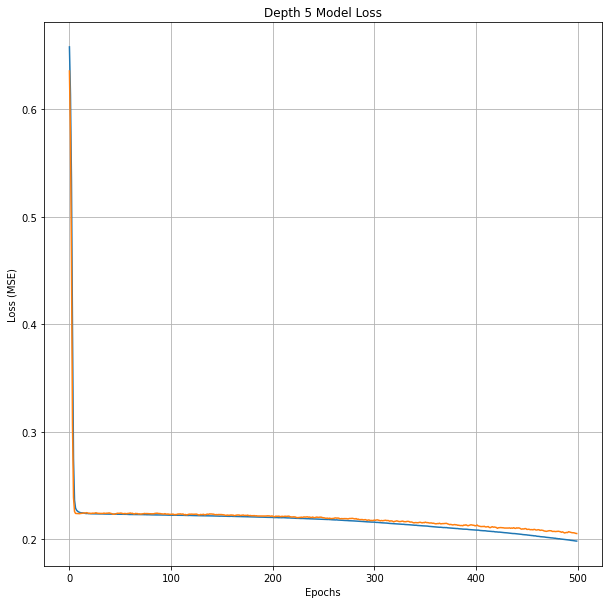

In [40]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 5 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

### Display Epoch vs. Accuracy plot

Text(0, 0.5, 'Accuracy')

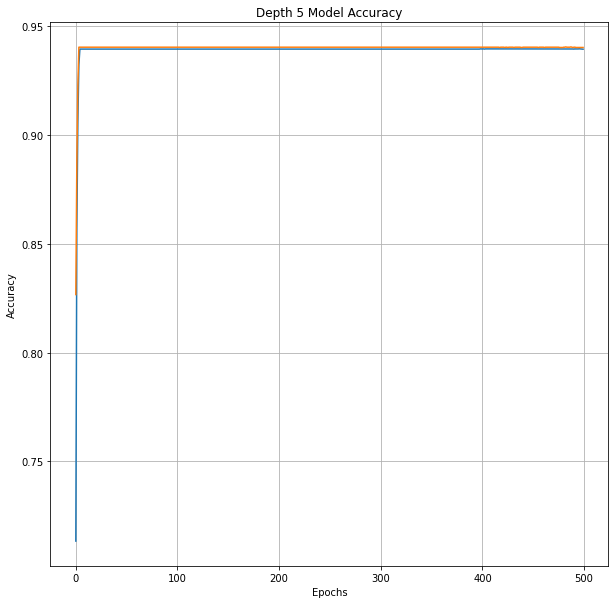

In [41]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 5 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

### Save model

In [ ]:
model_d5.save("model_d5.h5")

### K-fold cross validation

------------------------------------------------------------------------
Training for fold 1 ...
Train on 480 samples, validate on 160 samples
Epoch 1/800
480/480 [==============================] - 0s 376us/step - loss: 0.6858 - accuracy: 0.5593 - val_loss: 0.6774 - val_accuracy: 0.6239
Epoch 2/800
480/480 [==============================] - 0s 88us/step - loss: 0.6692 - accuracy: 0.6532 - val_loss: 0.6601 - val_accuracy: 0.6914
Epoch 3/800
480/480 [==============================] - 0s 83us/step - loss: 0.6491 - accuracy: 0.7337 - val_loss: 0.6361 - val_accuracy: 0.7836
Epoch 4/800
480/480 [==============================] - 0s 83us/step - loss: 0.6183 - accuracy: 0.8165 - val_loss: 0.5958 - val_accuracy: 0.8526
Epoch 5/800
480/480 [==============================] - 0s 83us/step - loss: 0.5629 - accuracy: 0.8836 - val_loss: 0.5198 - val_accuracy: 0.9045
Epoch 6/800
480/480 [==============================] - 0s 83us/step - loss: 0.4608 - accuracy: 0.9124 - val_loss: 0.3907 - val_accuracy:

480/480 [==============================] - 0s 90us/step - loss: 0.2243 - accuracy: 0.9389 - val_loss: 0.2280 - val_accuracy: 0.9385
Epoch 57/800
480/480 [==============================] - 0s 88us/step - loss: 0.2243 - accuracy: 0.9389 - val_loss: 0.2280 - val_accuracy: 0.9385
Epoch 58/800
480/480 [==============================] - 0s 88us/step - loss: 0.2243 - accuracy: 0.9389 - val_loss: 0.2280 - val_accuracy: 0.9385
Epoch 59/800
480/480 [==============================] - 0s 82us/step - loss: 0.2243 - accuracy: 0.9389 - val_loss: 0.2280 - val_accuracy: 0.9385
Epoch 60/800
480/480 [==============================] - 0s 81us/step - loss: 0.2242 - accuracy: 0.9389 - val_loss: 0.2279 - val_accuracy: 0.9385
Epoch 61/800
480/480 [==============================] - 0s 85us/step - loss: 0.2242 - accuracy: 0.9389 - val_loss: 0.2279 - val_accuracy: 0.9385
Epoch 62/800
480/480 [==============================] - 0s 83us/step - loss: 0.2242 - accuracy: 0.9389 - val_loss: 0.2279 - val_accuracy: 0.938

480/480 [==============================] - 0s 85us/step - loss: 0.2229 - accuracy: 0.9389 - val_loss: 0.2268 - val_accuracy: 0.9385
Epoch 113/800
480/480 [==============================] - 0s 90us/step - loss: 0.2229 - accuracy: 0.9389 - val_loss: 0.2268 - val_accuracy: 0.9385
Epoch 114/800
480/480 [==============================] - 0s 85us/step - loss: 0.2229 - accuracy: 0.9389 - val_loss: 0.2267 - val_accuracy: 0.9385
Epoch 115/800
480/480 [==============================] - 0s 82us/step - loss: 0.2228 - accuracy: 0.9389 - val_loss: 0.2267 - val_accuracy: 0.9385
Epoch 116/800
480/480 [==============================] - 0s 90us/step - loss: 0.2228 - accuracy: 0.9389 - val_loss: 0.2267 - val_accuracy: 0.9385
Epoch 117/800
480/480 [==============================] - 0s 83us/step - loss: 0.2227 - accuracy: 0.9389 - val_loss: 0.2267 - val_accuracy: 0.9385
Epoch 118/800
480/480 [==============================] - 0s 83us/step - loss: 0.2228 - accuracy: 0.9389 - val_loss: 0.2266 - val_accuracy:

480/480 [==============================] - 0s 94us/step - loss: 0.2212 - accuracy: 0.9389 - val_loss: 0.2253 - val_accuracy: 0.9385
Epoch 169/800
480/480 [==============================] - 0s 85us/step - loss: 0.2211 - accuracy: 0.9389 - val_loss: 0.2253 - val_accuracy: 0.9385
Epoch 170/800
480/480 [==============================] - 0s 83us/step - loss: 0.2211 - accuracy: 0.9389 - val_loss: 0.2253 - val_accuracy: 0.9385
Epoch 171/800
480/480 [==============================] - 0s 85us/step - loss: 0.2211 - accuracy: 0.9389 - val_loss: 0.2252 - val_accuracy: 0.9385
Epoch 172/800
480/480 [==============================] - 0s 83us/step - loss: 0.2210 - accuracy: 0.9389 - val_loss: 0.2252 - val_accuracy: 0.9385
Epoch 173/800
480/480 [==============================] - 0s 88us/step - loss: 0.2210 - accuracy: 0.9389 - val_loss: 0.2252 - val_accuracy: 0.9385
Epoch 174/800
480/480 [==============================] - 0s 94us/step - loss: 0.2209 - accuracy: 0.9389 - val_loss: 0.2251 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.2184 - accuracy: 0.9389 - val_loss: 0.2230 - val_accuracy: 0.9385
Epoch 225/800
480/480 [==============================] - 0s 83us/step - loss: 0.2184 - accuracy: 0.9389 - val_loss: 0.2230 - val_accuracy: 0.9385
Epoch 226/800
480/480 [==============================] - 0s 87us/step - loss: 0.2183 - accuracy: 0.9389 - val_loss: 0.2229 - val_accuracy: 0.9385
Epoch 227/800
480/480 [==============================] - 0s 83us/step - loss: 0.2183 - accuracy: 0.9389 - val_loss: 0.2229 - val_accuracy: 0.9385
Epoch 228/800
480/480 [==============================] - 0s 85us/step - loss: 0.2182 - accuracy: 0.9389 - val_loss: 0.2229 - val_accuracy: 0.9385
Epoch 229/800
480/480 [==============================] - 0s 93us/step - loss: 0.2181 - accuracy: 0.9389 - val_loss: 0.2228 - val_accuracy: 0.9385
Epoch 230/800
480/480 [==============================] - 0s 87us/step - loss: 0.2181 - accuracy: 0.9389 - val_loss: 0.2227 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.2142 - accuracy: 0.9389 - val_loss: 0.2197 - val_accuracy: 0.9385
Epoch 281/800
480/480 [==============================] - 0s 83us/step - loss: 0.2141 - accuracy: 0.9389 - val_loss: 0.2196 - val_accuracy: 0.9385
Epoch 282/800
480/480 [==============================] - 0s 85us/step - loss: 0.2140 - accuracy: 0.9389 - val_loss: 0.2195 - val_accuracy: 0.9385
Epoch 283/800
480/480 [==============================] - 0s 88us/step - loss: 0.2139 - accuracy: 0.9389 - val_loss: 0.2195 - val_accuracy: 0.9385
Epoch 284/800
480/480 [==============================] - 0s 83us/step - loss: 0.2138 - accuracy: 0.9389 - val_loss: 0.2194 - val_accuracy: 0.9385
Epoch 285/800
480/480 [==============================] - 0s 85us/step - loss: 0.2137 - accuracy: 0.9389 - val_loss: 0.2193 - val_accuracy: 0.9385
Epoch 286/800
480/480 [==============================] - 0s 83us/step - loss: 0.2136 - accuracy: 0.9389 - val_loss: 0.2192 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.2084 - accuracy: 0.9389 - val_loss: 0.2154 - val_accuracy: 0.9385
Epoch 337/800
480/480 [==============================] - 0s 79us/step - loss: 0.2083 - accuracy: 0.9389 - val_loss: 0.2153 - val_accuracy: 0.9385
Epoch 338/800
480/480 [==============================] - 0s 81us/step - loss: 0.2082 - accuracy: 0.9389 - val_loss: 0.2152 - val_accuracy: 0.9385
Epoch 339/800
480/480 [==============================] - 0s 81us/step - loss: 0.2081 - accuracy: 0.9389 - val_loss: 0.2151 - val_accuracy: 0.9385
Epoch 340/800
480/480 [==============================] - 0s 85us/step - loss: 0.2079 - accuracy: 0.9389 - val_loss: 0.2151 - val_accuracy: 0.9385
Epoch 341/800
480/480 [==============================] - 0s 85us/step - loss: 0.2078 - accuracy: 0.9389 - val_loss: 0.2149 - val_accuracy: 0.9385
Epoch 342/800
480/480 [==============================] - 0s 83us/step - loss: 0.2077 - accuracy: 0.9389 - val_loss: 0.2149 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.2020 - accuracy: 0.9391 - val_loss: 0.2112 - val_accuracy: 0.9384
Epoch 393/800
480/480 [==============================] - 0s 83us/step - loss: 0.2018 - accuracy: 0.9390 - val_loss: 0.2111 - val_accuracy: 0.9384
Epoch 394/800
480/480 [==============================] - 0s 85us/step - loss: 0.2018 - accuracy: 0.9391 - val_loss: 0.2110 - val_accuracy: 0.9384
Epoch 395/800
480/480 [==============================] - 0s 83us/step - loss: 0.2016 - accuracy: 0.9391 - val_loss: 0.2111 - val_accuracy: 0.9384
Epoch 396/800
480/480 [==============================] - 0s 85us/step - loss: 0.2015 - accuracy: 0.9391 - val_loss: 0.2110 - val_accuracy: 0.9384
Epoch 397/800
480/480 [==============================] - 0s 90us/step - loss: 0.2014 - accuracy: 0.9391 - val_loss: 0.2108 - val_accuracy: 0.9384
Epoch 398/800
480/480 [==============================] - 0s 85us/step - loss: 0.2013 - accuracy: 0.9391 - val_loss: 0.2108 - val_accuracy:

480/480 [==============================] - 0s 81us/step - loss: 0.1955 - accuracy: 0.9393 - val_loss: 0.2071 - val_accuracy: 0.9385
Epoch 449/800
480/480 [==============================] - 0s 88us/step - loss: 0.1954 - accuracy: 0.9393 - val_loss: 0.2071 - val_accuracy: 0.9384
Epoch 450/800
480/480 [==============================] - 0s 85us/step - loss: 0.1953 - accuracy: 0.9394 - val_loss: 0.2070 - val_accuracy: 0.9385
Epoch 451/800
480/480 [==============================] - 0s 90us/step - loss: 0.1952 - accuracy: 0.9393 - val_loss: 0.2069 - val_accuracy: 0.9385
Epoch 452/800
480/480 [==============================] - 0s 83us/step - loss: 0.1951 - accuracy: 0.9393 - val_loss: 0.2069 - val_accuracy: 0.9384
Epoch 453/800
480/480 [==============================] - 0s 88us/step - loss: 0.1949 - accuracy: 0.9393 - val_loss: 0.2068 - val_accuracy: 0.9385
Epoch 454/800
480/480 [==============================] - 0s 86us/step - loss: 0.1948 - accuracy: 0.9393 - val_loss: 0.2067 - val_accuracy:

480/480 [==============================] - 0s 90us/step - loss: 0.1884 - accuracy: 0.9396 - val_loss: 0.2026 - val_accuracy: 0.9385
Epoch 505/800
480/480 [==============================] - 0s 83us/step - loss: 0.1884 - accuracy: 0.9397 - val_loss: 0.2025 - val_accuracy: 0.9382
Epoch 506/800
480/480 [==============================] - 0s 81us/step - loss: 0.1882 - accuracy: 0.9396 - val_loss: 0.2024 - val_accuracy: 0.9387
Epoch 507/800
480/480 [==============================] - 0s 85us/step - loss: 0.1881 - accuracy: 0.9397 - val_loss: 0.2023 - val_accuracy: 0.9385
Epoch 508/800
480/480 [==============================] - 0s 88us/step - loss: 0.1880 - accuracy: 0.9396 - val_loss: 0.2022 - val_accuracy: 0.9382
Epoch 509/800
480/480 [==============================] - 0s 83us/step - loss: 0.1879 - accuracy: 0.9396 - val_loss: 0.2022 - val_accuracy: 0.9386
Epoch 510/800
480/480 [==============================] - 0s 88us/step - loss: 0.1876 - accuracy: 0.9396 - val_loss: 0.2020 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.1812 - accuracy: 0.9406 - val_loss: 0.1981 - val_accuracy: 0.9388
Epoch 561/800
480/480 [==============================] - 0s 83us/step - loss: 0.1810 - accuracy: 0.9406 - val_loss: 0.1982 - val_accuracy: 0.9390
Epoch 562/800
480/480 [==============================] - 0s 83us/step - loss: 0.1809 - accuracy: 0.9408 - val_loss: 0.1980 - val_accuracy: 0.9386
Epoch 563/800
480/480 [==============================] - 0s 83us/step - loss: 0.1807 - accuracy: 0.9406 - val_loss: 0.1979 - val_accuracy: 0.9390
Epoch 564/800
480/480 [==============================] - 0s 85us/step - loss: 0.1807 - accuracy: 0.9408 - val_loss: 0.1979 - val_accuracy: 0.9391
Epoch 565/800
480/480 [==============================] - 0s 83us/step - loss: 0.1805 - accuracy: 0.9411 - val_loss: 0.1978 - val_accuracy: 0.9391
Epoch 566/800
480/480 [==============================] - 0s 89us/step - loss: 0.1803 - accuracy: 0.9407 - val_loss: 0.1978 - val_accuracy:

480/480 [==============================] - 0s 88us/step - loss: 0.1743 - accuracy: 0.9417 - val_loss: 0.1943 - val_accuracy: 0.9391
Epoch 617/800
480/480 [==============================] - 0s 88us/step - loss: 0.1742 - accuracy: 0.9413 - val_loss: 0.1943 - val_accuracy: 0.9387
Epoch 618/800
480/480 [==============================] - 0s 81us/step - loss: 0.1741 - accuracy: 0.9415 - val_loss: 0.1941 - val_accuracy: 0.9387
Epoch 619/800
480/480 [==============================] - 0s 88us/step - loss: 0.1739 - accuracy: 0.9414 - val_loss: 0.1941 - val_accuracy: 0.9387
Epoch 620/800
480/480 [==============================] - 0s 83us/step - loss: 0.1739 - accuracy: 0.9416 - val_loss: 0.1941 - val_accuracy: 0.9392
Epoch 621/800
480/480 [==============================] - 0s 83us/step - loss: 0.1737 - accuracy: 0.9415 - val_loss: 0.1940 - val_accuracy: 0.9390
Epoch 622/800
480/480 [==============================] - 0s 90us/step - loss: 0.1736 - accuracy: 0.9416 - val_loss: 0.1940 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.1681 - accuracy: 0.9420 - val_loss: 0.1908 - val_accuracy: 0.9393
Epoch 673/800
480/480 [==============================] - 0s 85us/step - loss: 0.1681 - accuracy: 0.9424 - val_loss: 0.1907 - val_accuracy: 0.9393
Epoch 674/800
480/480 [==============================] - 0s 81us/step - loss: 0.1680 - accuracy: 0.9425 - val_loss: 0.1906 - val_accuracy: 0.9391
Epoch 675/800
480/480 [==============================] - 0s 85us/step - loss: 0.1678 - accuracy: 0.9423 - val_loss: 0.1905 - val_accuracy: 0.9391
Epoch 676/800
480/480 [==============================] - 0s 83us/step - loss: 0.1677 - accuracy: 0.9425 - val_loss: 0.1905 - val_accuracy: 0.9391
Epoch 677/800
480/480 [==============================] - 0s 85us/step - loss: 0.1676 - accuracy: 0.9423 - val_loss: 0.1904 - val_accuracy: 0.9387
Epoch 678/800
480/480 [==============================] - 0s 83us/step - loss: 0.1676 - accuracy: 0.9421 - val_loss: 0.1905 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.1620 - accuracy: 0.9433 - val_loss: 0.1871 - val_accuracy: 0.9395
Epoch 729/800
480/480 [==============================] - 0s 92us/step - loss: 0.1619 - accuracy: 0.9436 - val_loss: 0.1872 - val_accuracy: 0.9386
Epoch 730/800
480/480 [==============================] - 0s 85us/step - loss: 0.1619 - accuracy: 0.9437 - val_loss: 0.1873 - val_accuracy: 0.9392
Epoch 731/800
480/480 [==============================] - 0s 83us/step - loss: 0.1617 - accuracy: 0.9434 - val_loss: 0.1868 - val_accuracy: 0.9391
Epoch 732/800
480/480 [==============================] - 0s 88us/step - loss: 0.1616 - accuracy: 0.9438 - val_loss: 0.1869 - val_accuracy: 0.9391
Epoch 733/800
480/480 [==============================] - 0s 90us/step - loss: 0.1615 - accuracy: 0.9435 - val_loss: 0.1869 - val_accuracy: 0.9393
Epoch 734/800
480/480 [==============================] - 0s 85us/step - loss: 0.1615 - accuracy: 0.9434 - val_loss: 0.1868 - val_accuracy:

480/480 [==============================] - 0s 83us/step - loss: 0.1561 - accuracy: 0.9455 - val_loss: 0.1838 - val_accuracy: 0.9400
Epoch 785/800
480/480 [==============================] - 0s 85us/step - loss: 0.1560 - accuracy: 0.9455 - val_loss: 0.1838 - val_accuracy: 0.9406
Epoch 786/800
480/480 [==============================] - 0s 85us/step - loss: 0.1559 - accuracy: 0.9453 - val_loss: 0.1836 - val_accuracy: 0.9402
Epoch 787/800
480/480 [==============================] - 0s 81us/step - loss: 0.1558 - accuracy: 0.9452 - val_loss: 0.1837 - val_accuracy: 0.9406
Epoch 788/800
480/480 [==============================] - 0s 85us/step - loss: 0.1557 - accuracy: 0.9455 - val_loss: 0.1835 - val_accuracy: 0.9408
Epoch 789/800
480/480 [==============================] - 0s 88us/step - loss: 0.1555 - accuracy: 0.9458 - val_loss: 0.1837 - val_accuracy: 0.9403
Epoch 790/800
480/480 [==============================] - 0s 85us/step - loss: 0.1554 - accuracy: 0.9456 - val_loss: 0.1835 - val_accuracy:

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


------------------------------------------------------------------------
Training for fold 2 ...
Train on 480 samples, validate on 160 samples
Epoch 1/800
480/480 [==============================] - 0s 327us/step - loss: 0.6780 - accuracy: 0.6242 - val_loss: 0.6587 - val_accuracy: 0.7572
Epoch 2/800
480/480 [==============================] - 0s 94us/step - loss: 0.6393 - accuracy: 0.8222 - val_loss: 0.6140 - val_accuracy: 0.8661
Epoch 3/800
480/480 [==============================] - 0s 98us/step - loss: 0.5796 - accuracy: 0.8982 - val_loss: 0.5320 - val_accuracy: 0.9164
Epoch 4/800
480/480 [==============================] - 0s 102us/step - loss: 0.4672 - accuracy: 0.9310 - val_loss: 0.3889 - val_accuracy: 0.9368
Epoch 5/800
480/480 [==============================] - 0s 92us/step - loss: 0.3215 - accuracy: 0.9397 - val_loss: 0.2726 - val_accuracy: 0.9368
Epoch 6/800
480/480 [==============================] - 0s 87us/step - loss: 0.2471 - accuracy: 0.9397 - val_loss: 0.2433 - val_accuracy

480/480 [==============================] - 0s 85us/step - loss: 0.2224 - accuracy: 0.9397 - val_loss: 0.2343 - val_accuracy: 0.9368
Epoch 57/800
480/480 [==============================] - 0s 83us/step - loss: 0.2224 - accuracy: 0.9397 - val_loss: 0.2342 - val_accuracy: 0.9368
Epoch 58/800
480/480 [==============================] - 0s 90us/step - loss: 0.2223 - accuracy: 0.9397 - val_loss: 0.2342 - val_accuracy: 0.9368
Epoch 59/800
480/480 [==============================] - 0s 85us/step - loss: 0.2223 - accuracy: 0.9397 - val_loss: 0.2342 - val_accuracy: 0.9368
Epoch 60/800
480/480 [==============================] - 0s 79us/step - loss: 0.2223 - accuracy: 0.9397 - val_loss: 0.2342 - val_accuracy: 0.9368
Epoch 61/800
480/480 [==============================] - 0s 83us/step - loss: 0.2222 - accuracy: 0.9397 - val_loss: 0.2341 - val_accuracy: 0.9368
Epoch 62/800
480/480 [==============================] - 0s 92us/step - loss: 0.2222 - accuracy: 0.9397 - val_loss: 0.2341 - val_accuracy: 0.936

480/480 [==============================] - 0s 90us/step - loss: 0.2208 - accuracy: 0.9397 - val_loss: 0.2330 - val_accuracy: 0.9368
Epoch 113/800
480/480 [==============================] - 0s 85us/step - loss: 0.2207 - accuracy: 0.9397 - val_loss: 0.2330 - val_accuracy: 0.9368
Epoch 114/800
480/480 [==============================] - 0s 85us/step - loss: 0.2207 - accuracy: 0.9397 - val_loss: 0.2330 - val_accuracy: 0.9368
Epoch 115/800
480/480 [==============================] - 0s 81us/step - loss: 0.2207 - accuracy: 0.9397 - val_loss: 0.2330 - val_accuracy: 0.9368
Epoch 116/800
480/480 [==============================] - 0s 81us/step - loss: 0.2206 - accuracy: 0.9397 - val_loss: 0.2329 - val_accuracy: 0.9368
Epoch 117/800
480/480 [==============================] - 0s 85us/step - loss: 0.2206 - accuracy: 0.9397 - val_loss: 0.2330 - val_accuracy: 0.9368
Epoch 118/800
480/480 [==============================] - 0s 81us/step - loss: 0.2206 - accuracy: 0.9397 - val_loss: 0.2329 - val_accuracy:

480/480 [==============================] - 0s 83us/step - loss: 0.2187 - accuracy: 0.9397 - val_loss: 0.2314 - val_accuracy: 0.9368
Epoch 169/800
480/480 [==============================] - 0s 89us/step - loss: 0.2186 - accuracy: 0.9397 - val_loss: 0.2314 - val_accuracy: 0.9368
Epoch 170/800
480/480 [==============================] - 0s 85us/step - loss: 0.2185 - accuracy: 0.9397 - val_loss: 0.2314 - val_accuracy: 0.9368
Epoch 171/800
480/480 [==============================] - 0s 85us/step - loss: 0.2185 - accuracy: 0.9397 - val_loss: 0.2314 - val_accuracy: 0.9368
Epoch 172/800
480/480 [==============================] - 0s 83us/step - loss: 0.2184 - accuracy: 0.9397 - val_loss: 0.2313 - val_accuracy: 0.9368
Epoch 173/800
480/480 [==============================] - 0s 85us/step - loss: 0.2184 - accuracy: 0.9397 - val_loss: 0.2313 - val_accuracy: 0.9368
Epoch 174/800
480/480 [==============================] - 0s 85us/step - loss: 0.2184 - accuracy: 0.9397 - val_loss: 0.2313 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.2154 - accuracy: 0.9397 - val_loss: 0.2290 - val_accuracy: 0.9368
Epoch 225/800
480/480 [==============================] - 0s 88us/step - loss: 0.2153 - accuracy: 0.9397 - val_loss: 0.2289 - val_accuracy: 0.9368
Epoch 226/800
480/480 [==============================] - 0s 88us/step - loss: 0.2152 - accuracy: 0.9397 - val_loss: 0.2289 - val_accuracy: 0.9368
Epoch 227/800
480/480 [==============================] - 0s 83us/step - loss: 0.2151 - accuracy: 0.9397 - val_loss: 0.2288 - val_accuracy: 0.9368
Epoch 228/800
480/480 [==============================] - 0s 85us/step - loss: 0.2151 - accuracy: 0.9397 - val_loss: 0.2287 - val_accuracy: 0.9368
Epoch 229/800
480/480 [==============================] - 0s 88us/step - loss: 0.2149 - accuracy: 0.9397 - val_loss: 0.2287 - val_accuracy: 0.9368
Epoch 230/800
480/480 [==============================] - 0s 87us/step - loss: 0.2149 - accuracy: 0.9397 - val_loss: 0.2286 - val_accuracy:

480/480 [==============================] - 0s 81us/step - loss: 0.2096 - accuracy: 0.9397 - val_loss: 0.2246 - val_accuracy: 0.9368
Epoch 281/800
480/480 [==============================] - 0s 90us/step - loss: 0.2095 - accuracy: 0.9397 - val_loss: 0.2245 - val_accuracy: 0.9368
Epoch 282/800
480/480 [==============================] - 0s 85us/step - loss: 0.2094 - accuracy: 0.9397 - val_loss: 0.2245 - val_accuracy: 0.9368
Epoch 283/800
480/480 [==============================] - 0s 83us/step - loss: 0.2092 - accuracy: 0.9397 - val_loss: 0.2243 - val_accuracy: 0.9368
Epoch 284/800
480/480 [==============================] - 0s 88us/step - loss: 0.2091 - accuracy: 0.9397 - val_loss: 0.2242 - val_accuracy: 0.9368
Epoch 285/800
480/480 [==============================] - 0s 85us/step - loss: 0.2089 - accuracy: 0.9397 - val_loss: 0.2241 - val_accuracy: 0.9368
Epoch 286/800
480/480 [==============================] - 0s 85us/step - loss: 0.2089 - accuracy: 0.9397 - val_loss: 0.2240 - val_accuracy:

480/480 [==============================] - 0s 81us/step - loss: 0.2011 - accuracy: 0.9397 - val_loss: 0.2184 - val_accuracy: 0.9368
Epoch 337/800
480/480 [==============================] - 0s 85us/step - loss: 0.2009 - accuracy: 0.9397 - val_loss: 0.2184 - val_accuracy: 0.9368
Epoch 338/800
480/480 [==============================] - 0s 88us/step - loss: 0.2008 - accuracy: 0.9397 - val_loss: 0.2183 - val_accuracy: 0.9368
Epoch 339/800
480/480 [==============================] - 0s 83us/step - loss: 0.2006 - accuracy: 0.9397 - val_loss: 0.2182 - val_accuracy: 0.9368
Epoch 340/800
480/480 [==============================] - 0s 85us/step - loss: 0.2005 - accuracy: 0.9397 - val_loss: 0.2179 - val_accuracy: 0.9368
Epoch 341/800
480/480 [==============================] - 0s 79us/step - loss: 0.2003 - accuracy: 0.9397 - val_loss: 0.2178 - val_accuracy: 0.9368
Epoch 342/800
480/480 [==============================] - 0s 83us/step - loss: 0.2001 - accuracy: 0.9398 - val_loss: 0.2177 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.1915 - accuracy: 0.9399 - val_loss: 0.2115 - val_accuracy: 0.9369
Epoch 393/800
480/480 [==============================] - 0s 89us/step - loss: 0.1913 - accuracy: 0.9401 - val_loss: 0.2113 - val_accuracy: 0.9369
Epoch 394/800
480/480 [==============================] - 0s 90us/step - loss: 0.1912 - accuracy: 0.9400 - val_loss: 0.2113 - val_accuracy: 0.9369
Epoch 395/800
480/480 [==============================] - 0s 83us/step - loss: 0.1910 - accuracy: 0.9400 - val_loss: 0.2112 - val_accuracy: 0.9369
Epoch 396/800
480/480 [==============================] - 0s 81us/step - loss: 0.1909 - accuracy: 0.9400 - val_loss: 0.2111 - val_accuracy: 0.9369
Epoch 397/800
480/480 [==============================] - 0s 88us/step - loss: 0.1907 - accuracy: 0.9401 - val_loss: 0.2110 - val_accuracy: 0.9369
Epoch 398/800
480/480 [==============================] - 0s 88us/step - loss: 0.1905 - accuracy: 0.9402 - val_loss: 0.2109 - val_accuracy:

480/480 [==============================] - 0s 83us/step - loss: 0.1827 - accuracy: 0.9407 - val_loss: 0.2055 - val_accuracy: 0.9373
Epoch 449/800
480/480 [==============================] - 0s 85us/step - loss: 0.1825 - accuracy: 0.9407 - val_loss: 0.2053 - val_accuracy: 0.9373
Epoch 450/800
480/480 [==============================] - 0s 88us/step - loss: 0.1823 - accuracy: 0.9404 - val_loss: 0.2053 - val_accuracy: 0.9374
Epoch 451/800
480/480 [==============================] - 0s 88us/step - loss: 0.1822 - accuracy: 0.9406 - val_loss: 0.2051 - val_accuracy: 0.9374
Epoch 452/800
480/480 [==============================] - 0s 83us/step - loss: 0.1820 - accuracy: 0.9408 - val_loss: 0.2050 - val_accuracy: 0.9374
Epoch 453/800
480/480 [==============================] - 0s 85us/step - loss: 0.1818 - accuracy: 0.9408 - val_loss: 0.2051 - val_accuracy: 0.9374
Epoch 454/800
480/480 [==============================] - 0s 83us/step - loss: 0.1817 - accuracy: 0.9407 - val_loss: 0.2049 - val_accuracy:

Epoch 504/800
480/480 [==============================] - 0s 85us/step - loss: 0.1740 - accuracy: 0.9416 - val_loss: 0.1999 - val_accuracy: 0.9377
Epoch 505/800
480/480 [==============================] - 0s 85us/step - loss: 0.1739 - accuracy: 0.9414 - val_loss: 0.1997 - val_accuracy: 0.9377
Epoch 506/800
480/480 [==============================] - 0s 90us/step - loss: 0.1738 - accuracy: 0.9414 - val_loss: 0.1997 - val_accuracy: 0.9379
Epoch 507/800
480/480 [==============================] - 0s 85us/step - loss: 0.1736 - accuracy: 0.9414 - val_loss: 0.1995 - val_accuracy: 0.9377
Epoch 508/800
480/480 [==============================] - 0s 83us/step - loss: 0.1734 - accuracy: 0.9417 - val_loss: 0.1994 - val_accuracy: 0.9379
Epoch 509/800
480/480 [==============================] - 0s 90us/step - loss: 0.1732 - accuracy: 0.9415 - val_loss: 0.1994 - val_accuracy: 0.9380
Epoch 510/800
480/480 [==============================] - 0s 85us/step - loss: 0.1732 - accuracy: 0.9416 - val_loss: 0.1995 -

480/480 [==============================] - 0s 85us/step - loss: 0.1664 - accuracy: 0.9430 - val_loss: 0.1954 - val_accuracy: 0.9388
Epoch 561/800
480/480 [==============================] - 0s 85us/step - loss: 0.1662 - accuracy: 0.9430 - val_loss: 0.1954 - val_accuracy: 0.9391
Epoch 562/800
480/480 [==============================] - 0s 85us/step - loss: 0.1661 - accuracy: 0.9431 - val_loss: 0.1952 - val_accuracy: 0.9388
Epoch 563/800
480/480 [==============================] - 0s 84us/step - loss: 0.1660 - accuracy: 0.9430 - val_loss: 0.1953 - val_accuracy: 0.9390
Epoch 564/800
480/480 [==============================] - 0s 81us/step - loss: 0.1659 - accuracy: 0.9430 - val_loss: 0.1952 - val_accuracy: 0.9386
Epoch 565/800
480/480 [==============================] - 0s 85us/step - loss: 0.1658 - accuracy: 0.9429 - val_loss: 0.1953 - val_accuracy: 0.9391
Epoch 566/800
480/480 [==============================] - 0s 88us/step - loss: 0.1657 - accuracy: 0.9430 - val_loss: 0.1953 - val_accuracy:

Epoch 616/800
480/480 [==============================] - 0s 88us/step - loss: 0.1603 - accuracy: 0.9438 - val_loss: 0.1930 - val_accuracy: 0.9393
Epoch 617/800
480/480 [==============================] - 0s 88us/step - loss: 0.1601 - accuracy: 0.9437 - val_loss: 0.1930 - val_accuracy: 0.9395
Epoch 618/800
480/480 [==============================] - 0s 83us/step - loss: 0.1601 - accuracy: 0.9441 - val_loss: 0.1930 - val_accuracy: 0.9392
Epoch 619/800
480/480 [==============================] - 0s 88us/step - loss: 0.1599 - accuracy: 0.9439 - val_loss: 0.1929 - val_accuracy: 0.9396
Epoch 620/800
480/480 [==============================] - 0s 86us/step - loss: 0.1598 - accuracy: 0.9438 - val_loss: 0.1927 - val_accuracy: 0.9390
Epoch 621/800
480/480 [==============================] - 0s 88us/step - loss: 0.1598 - accuracy: 0.9440 - val_loss: 0.1927 - val_accuracy: 0.9396
Epoch 622/800
480/480 [==============================] - 0s 90us/step - loss: 0.1596 - accuracy: 0.9439 - val_loss: 0.1924 -

480/480 [==============================] - 0s 85us/step - loss: 0.1545 - accuracy: 0.9452 - val_loss: 0.1905 - val_accuracy: 0.9393
Epoch 673/800
480/480 [==============================] - 0s 88us/step - loss: 0.1544 - accuracy: 0.9451 - val_loss: 0.1901 - val_accuracy: 0.9396
Epoch 674/800
480/480 [==============================] - 0s 88us/step - loss: 0.1543 - accuracy: 0.9452 - val_loss: 0.1902 - val_accuracy: 0.9396
Epoch 675/800
480/480 [==============================] - 0s 85us/step - loss: 0.1542 - accuracy: 0.9453 - val_loss: 0.1901 - val_accuracy: 0.9392
Epoch 676/800
480/480 [==============================] - 0s 85us/step - loss: 0.1539 - accuracy: 0.9455 - val_loss: 0.1901 - val_accuracy: 0.9395
Epoch 677/800
480/480 [==============================] - 0s 85us/step - loss: 0.1539 - accuracy: 0.9451 - val_loss: 0.1904 - val_accuracy: 0.9390
Epoch 678/800
480/480 [==============================] - 0s 85us/step - loss: 0.1538 - accuracy: 0.9451 - val_loss: 0.1901 - val_accuracy:

480/480 [==============================] - 0s 88us/step - loss: 0.1483 - accuracy: 0.9464 - val_loss: 0.1874 - val_accuracy: 0.9401
Epoch 729/800
480/480 [==============================] - 0s 83us/step - loss: 0.1482 - accuracy: 0.9468 - val_loss: 0.1876 - val_accuracy: 0.9396
Epoch 730/800
480/480 [==============================] - 0s 83us/step - loss: 0.1480 - accuracy: 0.9469 - val_loss: 0.1874 - val_accuracy: 0.9398
Epoch 731/800
480/480 [==============================] - 0s 88us/step - loss: 0.1480 - accuracy: 0.9466 - val_loss: 0.1877 - val_accuracy: 0.9390
Epoch 732/800
480/480 [==============================] - 0s 83us/step - loss: 0.1479 - accuracy: 0.9468 - val_loss: 0.1874 - val_accuracy: 0.9392
Epoch 733/800
480/480 [==============================] - 0s 85us/step - loss: 0.1477 - accuracy: 0.9470 - val_loss: 0.1874 - val_accuracy: 0.9397
Epoch 734/800
480/480 [==============================] - 0s 86us/step - loss: 0.1477 - accuracy: 0.9467 - val_loss: 0.1872 - val_accuracy:

Epoch 784/800
480/480 [==============================] - 0s 85us/step - loss: 0.1426 - accuracy: 0.9483 - val_loss: 0.1848 - val_accuracy: 0.9395
Epoch 785/800
480/480 [==============================] - 0s 83us/step - loss: 0.1425 - accuracy: 0.9483 - val_loss: 0.1849 - val_accuracy: 0.9396
Epoch 786/800
480/480 [==============================] - 0s 85us/step - loss: 0.1424 - accuracy: 0.9485 - val_loss: 0.1847 - val_accuracy: 0.9396
Epoch 787/800
480/480 [==============================] - 0s 85us/step - loss: 0.1423 - accuracy: 0.9489 - val_loss: 0.1849 - val_accuracy: 0.9397
Epoch 788/800
480/480 [==============================] - 0s 83us/step - loss: 0.1422 - accuracy: 0.9485 - val_loss: 0.1850 - val_accuracy: 0.9390
Epoch 789/800
480/480 [==============================] - 0s 85us/step - loss: 0.1421 - accuracy: 0.9480 - val_loss: 0.1846 - val_accuracy: 0.9398
Epoch 790/800
480/480 [==============================] - 0s 85us/step - loss: 0.1419 - accuracy: 0.9484 - val_loss: 0.1846 -

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 3 ...
Train on 480 samples, validate on 160 samples
Epoch 1/800
480/480 [==============================] - 0s 354us/step - loss: 0.6779 - accuracy: 0.6459 - val_loss: 0.6648 - val_accuracy: 0.7456
Epoch 2/800
480/480 [==============================] - 0s 81us/step - loss: 0.6503 - accuracy: 0.7933 - val_loss: 0.6333 - val_accuracy: 0.8332
Epoch 3/800
480/480 [==============================] - 0s 83us/step - loss: 0.6099 - accuracy: 0.8651 - val_loss: 0.5811 - val_accuracy: 0.9013
Epoch 4/800
480/480 [==============================] - 0s 79us/step - loss: 0.5364 - accuracy: 0.9187 - val_loss: 0.4816 - val_accuracy: 0.9189
Epoch 5/800
480/480 [==============================] - 0s 83us/step - loss: 0.4087 - accuracy: 0.9329 - val_loss: 0.3391 - val_accuracy: 0.9363
Epoch 6/800
480/480 [==============================] - 0s 85us/step - loss: 0.2844 - accuracy: 0.9405 - val_loss: 0.2603 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.2208 - accuracy: 0.9405 - val_loss: 0.2348 - val_accuracy: 0.9363
Epoch 57/800
480/480 [==============================] - 0s 88us/step - loss: 0.2208 - accuracy: 0.9405 - val_loss: 0.2348 - val_accuracy: 0.9363
Epoch 58/800
480/480 [==============================] - 0s 88us/step - loss: 0.2208 - accuracy: 0.9405 - val_loss: 0.2348 - val_accuracy: 0.9363
Epoch 59/800
480/480 [==============================] - 0s 83us/step - loss: 0.2208 - accuracy: 0.9405 - val_loss: 0.2348 - val_accuracy: 0.9363
Epoch 60/800
480/480 [==============================] - 0s 90us/step - loss: 0.2207 - accuracy: 0.9405 - val_loss: 0.2347 - val_accuracy: 0.9363
Epoch 61/800
480/480 [==============================] - 0s 92us/step - loss: 0.2207 - accuracy: 0.9405 - val_loss: 0.2347 - val_accuracy: 0.9363
Epoch 62/800
480/480 [==============================] - 0s 83us/step - loss: 0.2207 - accuracy: 0.9405 - val_loss: 0.2347 - val_accuracy: 0.936

480/480 [==============================] - 0s 88us/step - loss: 0.2192 - accuracy: 0.9405 - val_loss: 0.2333 - val_accuracy: 0.9363
Epoch 113/800
480/480 [==============================] - 0s 88us/step - loss: 0.2192 - accuracy: 0.9405 - val_loss: 0.2333 - val_accuracy: 0.9363
Epoch 114/800
480/480 [==============================] - 0s 87us/step - loss: 0.2191 - accuracy: 0.9405 - val_loss: 0.2333 - val_accuracy: 0.9363
Epoch 115/800
480/480 [==============================] - 0s 81us/step - loss: 0.2191 - accuracy: 0.9405 - val_loss: 0.2332 - val_accuracy: 0.9363
Epoch 116/800
480/480 [==============================] - 0s 90us/step - loss: 0.2191 - accuracy: 0.9405 - val_loss: 0.2332 - val_accuracy: 0.9363
Epoch 117/800
480/480 [==============================] - 0s 90us/step - loss: 0.2190 - accuracy: 0.9405 - val_loss: 0.2332 - val_accuracy: 0.9363
Epoch 118/800
480/480 [==============================] - 0s 85us/step - loss: 0.2190 - accuracy: 0.9405 - val_loss: 0.2331 - val_accuracy:

480/480 [==============================] - 0s 83us/step - loss: 0.2170 - accuracy: 0.9405 - val_loss: 0.2315 - val_accuracy: 0.9363
Epoch 169/800
480/480 [==============================] - 0s 83us/step - loss: 0.2169 - accuracy: 0.9405 - val_loss: 0.2315 - val_accuracy: 0.9363
Epoch 170/800
480/480 [==============================] - 0s 85us/step - loss: 0.2169 - accuracy: 0.9405 - val_loss: 0.2314 - val_accuracy: 0.9363
Epoch 171/800
480/480 [==============================] - 0s 90us/step - loss: 0.2169 - accuracy: 0.9405 - val_loss: 0.2314 - val_accuracy: 0.9363
Epoch 172/800
480/480 [==============================] - 0s 88us/step - loss: 0.2168 - accuracy: 0.9405 - val_loss: 0.2314 - val_accuracy: 0.9363
Epoch 173/800
480/480 [==============================] - 0s 85us/step - loss: 0.2168 - accuracy: 0.9405 - val_loss: 0.2313 - val_accuracy: 0.9363
Epoch 174/800
480/480 [==============================] - 0s 90us/step - loss: 0.2167 - accuracy: 0.9405 - val_loss: 0.2313 - val_accuracy:

480/480 [==============================] - 0s 83us/step - loss: 0.2135 - accuracy: 0.9405 - val_loss: 0.2286 - val_accuracy: 0.9363
Epoch 225/800
480/480 [==============================] - 0s 87us/step - loss: 0.2134 - accuracy: 0.9405 - val_loss: 0.2286 - val_accuracy: 0.9363
Epoch 226/800
480/480 [==============================] - 0s 83us/step - loss: 0.2133 - accuracy: 0.9405 - val_loss: 0.2285 - val_accuracy: 0.9363
Epoch 227/800
480/480 [==============================] - 0s 90us/step - loss: 0.2133 - accuracy: 0.9405 - val_loss: 0.2284 - val_accuracy: 0.9363
Epoch 228/800
480/480 [==============================] - 0s 88us/step - loss: 0.2132 - accuracy: 0.9405 - val_loss: 0.2284 - val_accuracy: 0.9363
Epoch 229/800
480/480 [==============================] - 0s 85us/step - loss: 0.2131 - accuracy: 0.9405 - val_loss: 0.2283 - val_accuracy: 0.9363
Epoch 230/800
480/480 [==============================] - 0s 90us/step - loss: 0.2130 - accuracy: 0.9405 - val_loss: 0.2283 - val_accuracy:

480/480 [==============================] - 0s 79us/step - loss: 0.2080 - accuracy: 0.9405 - val_loss: 0.2244 - val_accuracy: 0.9363
Epoch 281/800
480/480 [==============================] - 0s 81us/step - loss: 0.2079 - accuracy: 0.9405 - val_loss: 0.2243 - val_accuracy: 0.9363
Epoch 282/800
480/480 [==============================] - 0s 83us/step - loss: 0.2079 - accuracy: 0.9405 - val_loss: 0.2242 - val_accuracy: 0.9363
Epoch 283/800
480/480 [==============================] - 0s 85us/step - loss: 0.2077 - accuracy: 0.9405 - val_loss: 0.2242 - val_accuracy: 0.9363
Epoch 284/800
480/480 [==============================] - 0s 85us/step - loss: 0.2076 - accuracy: 0.9405 - val_loss: 0.2240 - val_accuracy: 0.9363
Epoch 285/800
480/480 [==============================] - 0s 83us/step - loss: 0.2075 - accuracy: 0.9405 - val_loss: 0.2240 - val_accuracy: 0.9363
Epoch 286/800
480/480 [==============================] - 0s 81us/step - loss: 0.2074 - accuracy: 0.9405 - val_loss: 0.2239 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.2017 - accuracy: 0.9407 - val_loss: 0.2196 - val_accuracy: 0.9363
Epoch 337/800
480/480 [==============================] - 0s 83us/step - loss: 0.2016 - accuracy: 0.9407 - val_loss: 0.2195 - val_accuracy: 0.9363
Epoch 338/800
480/480 [==============================] - 0s 88us/step - loss: 0.2015 - accuracy: 0.9407 - val_loss: 0.2194 - val_accuracy: 0.9363
Epoch 339/800
480/480 [==============================] - 0s 83us/step - loss: 0.2013 - accuracy: 0.9407 - val_loss: 0.2194 - val_accuracy: 0.9363
Epoch 340/800
480/480 [==============================] - 0s 85us/step - loss: 0.2012 - accuracy: 0.9407 - val_loss: 0.2193 - val_accuracy: 0.9363
Epoch 341/800
480/480 [==============================] - 0s 85us/step - loss: 0.2011 - accuracy: 0.9407 - val_loss: 0.2192 - val_accuracy: 0.9363
Epoch 342/800
480/480 [==============================] - 0s 83us/step - loss: 0.2010 - accuracy: 0.9407 - val_loss: 0.2191 - val_accuracy:

480/480 [==============================] - 0s 90us/step - loss: 0.1946 - accuracy: 0.9408 - val_loss: 0.2141 - val_accuracy: 0.9366
Epoch 393/800
480/480 [==============================] - 0s 88us/step - loss: 0.1945 - accuracy: 0.9408 - val_loss: 0.2139 - val_accuracy: 0.9366
Epoch 394/800
480/480 [==============================] - 0s 81us/step - loss: 0.1944 - accuracy: 0.9408 - val_loss: 0.2139 - val_accuracy: 0.9366
Epoch 395/800
480/480 [==============================] - 0s 88us/step - loss: 0.1943 - accuracy: 0.9408 - val_loss: 0.2138 - val_accuracy: 0.9366
Epoch 396/800
480/480 [==============================] - 0s 83us/step - loss: 0.1941 - accuracy: 0.9409 - val_loss: 0.2137 - val_accuracy: 0.9366
Epoch 397/800
480/480 [==============================] - 0s 83us/step - loss: 0.1940 - accuracy: 0.9409 - val_loss: 0.2136 - val_accuracy: 0.9366
Epoch 398/800
480/480 [==============================] - 0s 88us/step - loss: 0.1939 - accuracy: 0.9409 - val_loss: 0.2135 - val_accuracy:

480/480 [==============================] - 0s 87us/step - loss: 0.1877 - accuracy: 0.9410 - val_loss: 0.2087 - val_accuracy: 0.9369
Epoch 449/800
480/480 [==============================] - 0s 83us/step - loss: 0.1875 - accuracy: 0.9411 - val_loss: 0.2086 - val_accuracy: 0.9369
Epoch 450/800
480/480 [==============================] - 0s 83us/step - loss: 0.1874 - accuracy: 0.9411 - val_loss: 0.2085 - val_accuracy: 0.9369
Epoch 451/800
480/480 [==============================] - 0s 83us/step - loss: 0.1873 - accuracy: 0.9409 - val_loss: 0.2085 - val_accuracy: 0.9369
Epoch 452/800
480/480 [==============================] - 0s 83us/step - loss: 0.1872 - accuracy: 0.9411 - val_loss: 0.2083 - val_accuracy: 0.9369
Epoch 453/800
480/480 [==============================] - 0s 88us/step - loss: 0.1871 - accuracy: 0.9411 - val_loss: 0.2083 - val_accuracy: 0.9369
Epoch 454/800
480/480 [==============================] - 0s 90us/step - loss: 0.1869 - accuracy: 0.9410 - val_loss: 0.2082 - val_accuracy:

480/480 [==============================] - 0s 86us/step - loss: 0.1807 - accuracy: 0.9414 - val_loss: 0.2034 - val_accuracy: 0.9366
Epoch 505/800
480/480 [==============================] - 0s 81us/step - loss: 0.1805 - accuracy: 0.9415 - val_loss: 0.2033 - val_accuracy: 0.9365
Epoch 506/800
480/480 [==============================] - 0s 83us/step - loss: 0.1804 - accuracy: 0.9414 - val_loss: 0.2034 - val_accuracy: 0.9364
Epoch 507/800
480/480 [==============================] - 0s 88us/step - loss: 0.1803 - accuracy: 0.9415 - val_loss: 0.2032 - val_accuracy: 0.9365
Epoch 508/800
480/480 [==============================] - 0s 83us/step - loss: 0.1801 - accuracy: 0.9413 - val_loss: 0.2032 - val_accuracy: 0.9366
Epoch 509/800
480/480 [==============================] - 0s 90us/step - loss: 0.1800 - accuracy: 0.9413 - val_loss: 0.2030 - val_accuracy: 0.9365
Epoch 510/800
480/480 [==============================] - 0s 83us/step - loss: 0.1799 - accuracy: 0.9413 - val_loss: 0.2030 - val_accuracy:

480/480 [==============================] - 0s 83us/step - loss: 0.1734 - accuracy: 0.9422 - val_loss: 0.1987 - val_accuracy: 0.9359
Epoch 561/800
480/480 [==============================] - 0s 90us/step - loss: 0.1733 - accuracy: 0.9422 - val_loss: 0.1985 - val_accuracy: 0.9354
Epoch 562/800
480/480 [==============================] - 0s 92us/step - loss: 0.1731 - accuracy: 0.9423 - val_loss: 0.1983 - val_accuracy: 0.9358
Epoch 563/800
480/480 [==============================] - 0s 83us/step - loss: 0.1730 - accuracy: 0.9422 - val_loss: 0.1982 - val_accuracy: 0.9357
Epoch 564/800
480/480 [==============================] - 0s 81us/step - loss: 0.1729 - accuracy: 0.9421 - val_loss: 0.1983 - val_accuracy: 0.9358
Epoch 565/800
480/480 [==============================] - 0s 88us/step - loss: 0.1728 - accuracy: 0.9422 - val_loss: 0.1981 - val_accuracy: 0.9358
Epoch 566/800
480/480 [==============================] - 0s 83us/step - loss: 0.1726 - accuracy: 0.9423 - val_loss: 0.1981 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.1667 - accuracy: 0.9429 - val_loss: 0.1943 - val_accuracy: 0.9355
Epoch 617/800
480/480 [==============================] - 0s 85us/step - loss: 0.1666 - accuracy: 0.9431 - val_loss: 0.1942 - val_accuracy: 0.9355
Epoch 618/800
480/480 [==============================] - 0s 85us/step - loss: 0.1665 - accuracy: 0.9431 - val_loss: 0.1943 - val_accuracy: 0.9355
Epoch 619/800
480/480 [==============================] - 0s 81us/step - loss: 0.1665 - accuracy: 0.9432 - val_loss: 0.1943 - val_accuracy: 0.9352
Epoch 620/800
480/480 [==============================] - 0s 83us/step - loss: 0.1663 - accuracy: 0.9430 - val_loss: 0.1942 - val_accuracy: 0.9352
Epoch 621/800
480/480 [==============================] - 0s 85us/step - loss: 0.1662 - accuracy: 0.9430 - val_loss: 0.1939 - val_accuracy: 0.9353
Epoch 622/800
480/480 [==============================] - 0s 83us/step - loss: 0.1661 - accuracy: 0.9429 - val_loss: 0.1940 - val_accuracy:

480/480 [==============================] - 0s 79us/step - loss: 0.1613 - accuracy: 0.9440 - val_loss: 0.1910 - val_accuracy: 0.9360
Epoch 673/800
480/480 [==============================] - 0s 90us/step - loss: 0.1611 - accuracy: 0.9442 - val_loss: 0.1913 - val_accuracy: 0.9355
Epoch 674/800
480/480 [==============================] - 0s 79us/step - loss: 0.1611 - accuracy: 0.9442 - val_loss: 0.1913 - val_accuracy: 0.9359
Epoch 675/800
480/480 [==============================] - 0s 83us/step - loss: 0.1610 - accuracy: 0.9442 - val_loss: 0.1913 - val_accuracy: 0.9358
Epoch 676/800
480/480 [==============================] - 0s 83us/step - loss: 0.1608 - accuracy: 0.9442 - val_loss: 0.1912 - val_accuracy: 0.9358
Epoch 677/800
480/480 [==============================] - 0s 88us/step - loss: 0.1608 - accuracy: 0.9442 - val_loss: 0.1913 - val_accuracy: 0.9357
Epoch 678/800
480/480 [==============================] - 0s 86us/step - loss: 0.1607 - accuracy: 0.9443 - val_loss: 0.1912 - val_accuracy:

480/480 [==============================] - 0s 83us/step - loss: 0.1562 - accuracy: 0.9449 - val_loss: 0.1887 - val_accuracy: 0.9362
Epoch 729/800
480/480 [==============================] - 0s 88us/step - loss: 0.1560 - accuracy: 0.9451 - val_loss: 0.1886 - val_accuracy: 0.9364
Epoch 730/800
480/480 [==============================] - 0s 88us/step - loss: 0.1559 - accuracy: 0.9454 - val_loss: 0.1885 - val_accuracy: 0.9365
Epoch 731/800
480/480 [==============================] - 0s 81us/step - loss: 0.1558 - accuracy: 0.9450 - val_loss: 0.1884 - val_accuracy: 0.9363
Epoch 732/800
480/480 [==============================] - 0s 85us/step - loss: 0.1557 - accuracy: 0.9452 - val_loss: 0.1885 - val_accuracy: 0.9363
Epoch 733/800
480/480 [==============================] - 0s 81us/step - loss: 0.1557 - accuracy: 0.9455 - val_loss: 0.1883 - val_accuracy: 0.9363
Epoch 734/800
480/480 [==============================] - 0s 81us/step - loss: 0.1555 - accuracy: 0.9455 - val_loss: 0.1883 - val_accuracy:

480/480 [==============================] - 0s 83us/step - loss: 0.1507 - accuracy: 0.9470 - val_loss: 0.1855 - val_accuracy: 0.9374
Epoch 785/800
480/480 [==============================] - 0s 83us/step - loss: 0.1505 - accuracy: 0.9464 - val_loss: 0.1855 - val_accuracy: 0.9370
Epoch 786/800
480/480 [==============================] - 0s 81us/step - loss: 0.1503 - accuracy: 0.9466 - val_loss: 0.1851 - val_accuracy: 0.9370
Epoch 787/800
480/480 [==============================] - 0s 88us/step - loss: 0.1504 - accuracy: 0.9468 - val_loss: 0.1852 - val_accuracy: 0.9370
Epoch 788/800
480/480 [==============================] - 0s 83us/step - loss: 0.1502 - accuracy: 0.9466 - val_loss: 0.1855 - val_accuracy: 0.9369
Epoch 789/800
480/480 [==============================] - 0s 81us/step - loss: 0.1501 - accuracy: 0.9469 - val_loss: 0.1854 - val_accuracy: 0.9366
Epoch 790/800
480/480 [==============================] - 0s 83us/step - loss: 0.1500 - accuracy: 0.9469 - val_loss: 0.1853 - val_accuracy:

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 4 ...
Train on 480 samples, validate on 160 samples
Epoch 1/800
480/480 [==============================] - 0s 331us/step - loss: 0.6900 - accuracy: 0.5989 - val_loss: 0.6841 - val_accuracy: 0.6494
Epoch 2/800
480/480 [==============================] - 0s 83us/step - loss: 0.6783 - accuracy: 0.6885 - val_loss: 0.6721 - val_accuracy: 0.7244
Epoch 3/800
480/480 [==============================] - 0s 88us/step - loss: 0.6650 - accuracy: 0.7637 - val_loss: 0.6576 - val_accuracy: 0.8042
Epoch 4/800
480/480 [==============================] - 0s 88us/step - loss: 0.6477 - accuracy: 0.8366 - val_loss: 0.6371 - val_accuracy: 0.8631
Epoch 5/800
480/480 [==============================] - 0s 88us/step - loss: 0.6212 - accuracy: 0.8866 - val_loss: 0.6034 - val_accuracy: 0.8996
Epoch 6/800
480/480 [==============================] - 0s 89us/step - loss: 0.5746 - accuracy: 0.9153 - val_loss: 0.5408 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.2207 - accuracy: 0.9402 - val_loss: 0.2349 - val_accuracy: 0.9363
Epoch 57/800
480/480 [==============================] - 0s 88us/step - loss: 0.2207 - accuracy: 0.9402 - val_loss: 0.2349 - val_accuracy: 0.9363
Epoch 58/800
480/480 [==============================] - 0s 83us/step - loss: 0.2207 - accuracy: 0.9402 - val_loss: 0.2349 - val_accuracy: 0.9363
Epoch 59/800
480/480 [==============================] - 0s 83us/step - loss: 0.2206 - accuracy: 0.9402 - val_loss: 0.2348 - val_accuracy: 0.9363
Epoch 60/800
480/480 [==============================] - 0s 85us/step - loss: 0.2206 - accuracy: 0.9402 - val_loss: 0.2348 - val_accuracy: 0.9363
Epoch 61/800
480/480 [==============================] - 0s 85us/step - loss: 0.2206 - accuracy: 0.9402 - val_loss: 0.2348 - val_accuracy: 0.9363
Epoch 62/800
480/480 [==============================] - 0s 85us/step - loss: 0.2206 - accuracy: 0.9402 - val_loss: 0.2348 - val_accuracy: 0.936

480/480 [==============================] - 0s 84us/step - loss: 0.2195 - accuracy: 0.9402 - val_loss: 0.2337 - val_accuracy: 0.9363
Epoch 113/800
480/480 [==============================] - 0s 85us/step - loss: 0.2194 - accuracy: 0.9402 - val_loss: 0.2337 - val_accuracy: 0.9363
Epoch 114/800
480/480 [==============================] - 0s 85us/step - loss: 0.2194 - accuracy: 0.9402 - val_loss: 0.2337 - val_accuracy: 0.9363
Epoch 115/800
480/480 [==============================] - 0s 83us/step - loss: 0.2194 - accuracy: 0.9402 - val_loss: 0.2336 - val_accuracy: 0.9363
Epoch 116/800
480/480 [==============================] - 0s 83us/step - loss: 0.2194 - accuracy: 0.9402 - val_loss: 0.2336 - val_accuracy: 0.9363
Epoch 117/800
480/480 [==============================] - 0s 81us/step - loss: 0.2193 - accuracy: 0.9402 - val_loss: 0.2336 - val_accuracy: 0.9363
Epoch 118/800
480/480 [==============================] - 0s 88us/step - loss: 0.2193 - accuracy: 0.9402 - val_loss: 0.2336 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.2180 - accuracy: 0.9402 - val_loss: 0.2323 - val_accuracy: 0.9363
Epoch 169/800
480/480 [==============================] - 0s 88us/step - loss: 0.2180 - accuracy: 0.9402 - val_loss: 0.2323 - val_accuracy: 0.9363
Epoch 170/800
480/480 [==============================] - 0s 88us/step - loss: 0.2179 - accuracy: 0.9402 - val_loss: 0.2322 - val_accuracy: 0.9363
Epoch 171/800
480/480 [==============================] - 0s 88us/step - loss: 0.2179 - accuracy: 0.9402 - val_loss: 0.2322 - val_accuracy: 0.9363
Epoch 172/800
480/480 [==============================] - 0s 81us/step - loss: 0.2179 - accuracy: 0.9402 - val_loss: 0.2322 - val_accuracy: 0.9363
Epoch 173/800
480/480 [==============================] - 0s 85us/step - loss: 0.2178 - accuracy: 0.9402 - val_loss: 0.2321 - val_accuracy: 0.9363
Epoch 174/800
480/480 [==============================] - 0s 85us/step - loss: 0.2178 - accuracy: 0.9402 - val_loss: 0.2321 - val_accuracy:

Epoch 224/800
480/480 [==============================] - 0s 88us/step - loss: 0.2160 - accuracy: 0.9402 - val_loss: 0.2304 - val_accuracy: 0.9363
Epoch 225/800
480/480 [==============================] - 0s 85us/step - loss: 0.2159 - accuracy: 0.9402 - val_loss: 0.2303 - val_accuracy: 0.9363
Epoch 226/800
480/480 [==============================] - 0s 83us/step - loss: 0.2159 - accuracy: 0.9402 - val_loss: 0.2302 - val_accuracy: 0.9363
Epoch 227/800
480/480 [==============================] - 0s 85us/step - loss: 0.2158 - accuracy: 0.9402 - val_loss: 0.2302 - val_accuracy: 0.9363
Epoch 228/800
480/480 [==============================] - 0s 88us/step - loss: 0.2157 - accuracy: 0.9402 - val_loss: 0.2302 - val_accuracy: 0.9363
Epoch 229/800
480/480 [==============================] - 0s 88us/step - loss: 0.2157 - accuracy: 0.9402 - val_loss: 0.2301 - val_accuracy: 0.9363
Epoch 230/800
480/480 [==============================] - 0s 91us/step - loss: 0.2156 - accuracy: 0.9402 - val_loss: 0.2301 -

480/480 [==============================] - 0s 90us/step - loss: 0.2127 - accuracy: 0.9402 - val_loss: 0.2274 - val_accuracy: 0.9363
Epoch 281/800
480/480 [==============================] - 0s 83us/step - loss: 0.2127 - accuracy: 0.9402 - val_loss: 0.2273 - val_accuracy: 0.9363
Epoch 282/800
480/480 [==============================] - 0s 88us/step - loss: 0.2126 - accuracy: 0.9402 - val_loss: 0.2272 - val_accuracy: 0.9363
Epoch 283/800
480/480 [==============================] - 0s 85us/step - loss: 0.2125 - accuracy: 0.9402 - val_loss: 0.2272 - val_accuracy: 0.9363
Epoch 284/800
480/480 [==============================] - 0s 84us/step - loss: 0.2124 - accuracy: 0.9402 - val_loss: 0.2271 - val_accuracy: 0.9363
Epoch 285/800
480/480 [==============================] - 0s 87us/step - loss: 0.2124 - accuracy: 0.9402 - val_loss: 0.2270 - val_accuracy: 0.9363
Epoch 286/800
480/480 [==============================] - 0s 90us/step - loss: 0.2123 - accuracy: 0.9402 - val_loss: 0.2269 - val_accuracy:

480/480 [==============================] - 0s 90us/step - loss: 0.2073 - accuracy: 0.9402 - val_loss: 0.2225 - val_accuracy: 0.9363
Epoch 337/800
480/480 [==============================] - 0s 87us/step - loss: 0.2071 - accuracy: 0.9402 - val_loss: 0.2223 - val_accuracy: 0.9363
Epoch 338/800
480/480 [==============================] - 0s 88us/step - loss: 0.2070 - accuracy: 0.9402 - val_loss: 0.2223 - val_accuracy: 0.9363
Epoch 339/800
480/480 [==============================] - 0s 85us/step - loss: 0.2069 - accuracy: 0.9402 - val_loss: 0.2222 - val_accuracy: 0.9363
Epoch 340/800
480/480 [==============================] - 0s 85us/step - loss: 0.2068 - accuracy: 0.9402 - val_loss: 0.2221 - val_accuracy: 0.9363
Epoch 341/800
480/480 [==============================] - 0s 85us/step - loss: 0.2066 - accuracy: 0.9402 - val_loss: 0.2219 - val_accuracy: 0.9363
Epoch 342/800
480/480 [==============================] - 0s 85us/step - loss: 0.2065 - accuracy: 0.9402 - val_loss: 0.2218 - val_accuracy:

Epoch 392/800
480/480 [==============================] - 0s 88us/step - loss: 0.1991 - accuracy: 0.9404 - val_loss: 0.2154 - val_accuracy: 0.9362
Epoch 393/800
480/480 [==============================] - 0s 83us/step - loss: 0.1989 - accuracy: 0.9405 - val_loss: 0.2153 - val_accuracy: 0.9362
Epoch 394/800
480/480 [==============================] - 0s 88us/step - loss: 0.1988 - accuracy: 0.9405 - val_loss: 0.2152 - val_accuracy: 0.9362
Epoch 395/800
480/480 [==============================] - 0s 81us/step - loss: 0.1986 - accuracy: 0.9405 - val_loss: 0.2150 - val_accuracy: 0.9362
Epoch 396/800
480/480 [==============================] - 0s 85us/step - loss: 0.1985 - accuracy: 0.9405 - val_loss: 0.2149 - val_accuracy: 0.9362
Epoch 397/800
480/480 [==============================] - 0s 83us/step - loss: 0.1983 - accuracy: 0.9405 - val_loss: 0.2147 - val_accuracy: 0.9362
Epoch 398/800
480/480 [==============================] - 0s 83us/step - loss: 0.1981 - accuracy: 0.9405 - val_loss: 0.2146 -

Epoch 448/800
480/480 [==============================] - 0s 83us/step - loss: 0.1904 - accuracy: 0.9413 - val_loss: 0.2083 - val_accuracy: 0.9364
Epoch 449/800
480/480 [==============================] - 0s 85us/step - loss: 0.1903 - accuracy: 0.9413 - val_loss: 0.2083 - val_accuracy: 0.9364
Epoch 450/800
480/480 [==============================] - 0s 85us/step - loss: 0.1901 - accuracy: 0.9413 - val_loss: 0.2081 - val_accuracy: 0.9364
Epoch 451/800
480/480 [==============================] - 0s 81us/step - loss: 0.1900 - accuracy: 0.9413 - val_loss: 0.2079 - val_accuracy: 0.9364
Epoch 452/800
480/480 [==============================] - 0s 85us/step - loss: 0.1898 - accuracy: 0.9412 - val_loss: 0.2079 - val_accuracy: 0.9364
Epoch 453/800
480/480 [==============================] - 0s 88us/step - loss: 0.1897 - accuracy: 0.9414 - val_loss: 0.2078 - val_accuracy: 0.9364
Epoch 454/800
480/480 [==============================] - 0s 85us/step - loss: 0.1896 - accuracy: 0.9414 - val_loss: 0.2077 -

Epoch 504/800
480/480 [==============================] - 0s 90us/step - loss: 0.1832 - accuracy: 0.9420 - val_loss: 0.2031 - val_accuracy: 0.9365
Epoch 505/800
480/480 [==============================] - 0s 83us/step - loss: 0.1831 - accuracy: 0.9419 - val_loss: 0.2030 - val_accuracy: 0.9366
Epoch 506/800
480/480 [==============================] - 0s 83us/step - loss: 0.1829 - accuracy: 0.9420 - val_loss: 0.2030 - val_accuracy: 0.9366
Epoch 507/800
480/480 [==============================] - 0s 88us/step - loss: 0.1828 - accuracy: 0.9420 - val_loss: 0.2029 - val_accuracy: 0.9366
Epoch 508/800
480/480 [==============================] - 0s 85us/step - loss: 0.1827 - accuracy: 0.9419 - val_loss: 0.2028 - val_accuracy: 0.9364
Epoch 509/800
480/480 [==============================] - 0s 85us/step - loss: 0.1825 - accuracy: 0.9418 - val_loss: 0.2027 - val_accuracy: 0.9366
Epoch 510/800
480/480 [==============================] - 0s 85us/step - loss: 0.1825 - accuracy: 0.9420 - val_loss: 0.2026 -

480/480 [==============================] - 0s 90us/step - loss: 0.1770 - accuracy: 0.9429 - val_loss: 0.1993 - val_accuracy: 0.9369
Epoch 561/800
480/480 [==============================] - 0s 85us/step - loss: 0.1770 - accuracy: 0.9428 - val_loss: 0.1993 - val_accuracy: 0.9369
Epoch 562/800
480/480 [==============================] - 0s 83us/step - loss: 0.1769 - accuracy: 0.9429 - val_loss: 0.1994 - val_accuracy: 0.9366
Epoch 563/800
480/480 [==============================] - 0s 85us/step - loss: 0.1767 - accuracy: 0.9429 - val_loss: 0.1992 - val_accuracy: 0.9368
Epoch 564/800
480/480 [==============================] - 0s 85us/step - loss: 0.1767 - accuracy: 0.9427 - val_loss: 0.1991 - val_accuracy: 0.9366
Epoch 565/800
480/480 [==============================] - 0s 83us/step - loss: 0.1766 - accuracy: 0.9426 - val_loss: 0.1992 - val_accuracy: 0.9366
Epoch 566/800
480/480 [==============================] - 0s 88us/step - loss: 0.1765 - accuracy: 0.9427 - val_loss: 0.1991 - val_accuracy:

480/480 [==============================] - 0s 90us/step - loss: 0.1716 - accuracy: 0.9435 - val_loss: 0.1962 - val_accuracy: 0.9365
Epoch 617/800
480/480 [==============================] - 0s 90us/step - loss: 0.1714 - accuracy: 0.9435 - val_loss: 0.1964 - val_accuracy: 0.9363
Epoch 618/800
480/480 [==============================] - 0s 81us/step - loss: 0.1714 - accuracy: 0.9435 - val_loss: 0.1962 - val_accuracy: 0.9365
Epoch 619/800
480/480 [==============================] - 0s 88us/step - loss: 0.1713 - accuracy: 0.9433 - val_loss: 0.1962 - val_accuracy: 0.9365
Epoch 620/800
480/480 [==============================] - 0s 83us/step - loss: 0.1712 - accuracy: 0.9437 - val_loss: 0.1962 - val_accuracy: 0.9365
Epoch 621/800
480/480 [==============================] - 0s 85us/step - loss: 0.1711 - accuracy: 0.9434 - val_loss: 0.1961 - val_accuracy: 0.9368
Epoch 622/800
480/480 [==============================] - 0s 92us/step - loss: 0.1710 - accuracy: 0.9438 - val_loss: 0.1960 - val_accuracy:

480/480 [==============================] - 0s 91us/step - loss: 0.1662 - accuracy: 0.9440 - val_loss: 0.1937 - val_accuracy: 0.9369
Epoch 673/800
480/480 [==============================] - 0s 81us/step - loss: 0.1662 - accuracy: 0.9440 - val_loss: 0.1935 - val_accuracy: 0.9368
Epoch 674/800
480/480 [==============================] - 0s 83us/step - loss: 0.1661 - accuracy: 0.9441 - val_loss: 0.1934 - val_accuracy: 0.9369
Epoch 675/800
480/480 [==============================] - 0s 87us/step - loss: 0.1660 - accuracy: 0.9437 - val_loss: 0.1935 - val_accuracy: 0.9368
Epoch 676/800
480/480 [==============================] - 0s 83us/step - loss: 0.1658 - accuracy: 0.9439 - val_loss: 0.1934 - val_accuracy: 0.9368
Epoch 677/800
480/480 [==============================] - 0s 85us/step - loss: 0.1658 - accuracy: 0.9442 - val_loss: 0.1934 - val_accuracy: 0.9366
Epoch 678/800
480/480 [==============================] - 0s 88us/step - loss: 0.1657 - accuracy: 0.9440 - val_loss: 0.1935 - val_accuracy:

Epoch 728/800
480/480 [==============================] - 0s 85us/step - loss: 0.1610 - accuracy: 0.9448 - val_loss: 0.1910 - val_accuracy: 0.9365
Epoch 729/800
480/480 [==============================] - 0s 85us/step - loss: 0.1608 - accuracy: 0.9447 - val_loss: 0.1909 - val_accuracy: 0.9368
Epoch 730/800
480/480 [==============================] - 0s 90us/step - loss: 0.1607 - accuracy: 0.9446 - val_loss: 0.1908 - val_accuracy: 0.9373
Epoch 731/800
480/480 [==============================] - 0s 85us/step - loss: 0.1606 - accuracy: 0.9447 - val_loss: 0.1907 - val_accuracy: 0.9365
Epoch 732/800
480/480 [==============================] - 0s 85us/step - loss: 0.1606 - accuracy: 0.9447 - val_loss: 0.1908 - val_accuracy: 0.9376
Epoch 733/800
480/480 [==============================] - 0s 81us/step - loss: 0.1604 - accuracy: 0.9447 - val_loss: 0.1909 - val_accuracy: 0.9371
Epoch 734/800
480/480 [==============================] - 0s 90us/step - loss: 0.1604 - accuracy: 0.9449 - val_loss: 0.1907 -

480/480 [==============================] - 0s 90us/step - loss: 0.1559 - accuracy: 0.9457 - val_loss: 0.1888 - val_accuracy: 0.9380
Epoch 785/800
480/480 [==============================] - 0s 90us/step - loss: 0.1557 - accuracy: 0.9457 - val_loss: 0.1887 - val_accuracy: 0.9379
Epoch 786/800
480/480 [==============================] - 0s 88us/step - loss: 0.1557 - accuracy: 0.9458 - val_loss: 0.1890 - val_accuracy: 0.9377
Epoch 787/800
480/480 [==============================] - 0s 85us/step - loss: 0.1556 - accuracy: 0.9456 - val_loss: 0.1891 - val_accuracy: 0.9374
Epoch 788/800
480/480 [==============================] - 0s 83us/step - loss: 0.1555 - accuracy: 0.9461 - val_loss: 0.1890 - val_accuracy: 0.9376
Epoch 789/800
480/480 [==============================] - 0s 87us/step - loss: 0.1555 - accuracy: 0.9455 - val_loss: 0.1888 - val_accuracy: 0.9377
Epoch 790/800
480/480 [==============================] - 0s 83us/step - loss: 0.1554 - accuracy: 0.9458 - val_loss: 0.1889 - val_accuracy:

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 5 ...
Train on 480 samples, validate on 160 samples
Epoch 1/800
480/480 [==============================] - 0s 335us/step - loss: 0.6930 - accuracy: 0.5020 - val_loss: 0.6831 - val_accuracy: 0.6176
Epoch 2/800
480/480 [==============================] - 0s 85us/step - loss: 0.6747 - accuracy: 0.6728 - val_loss: 0.6651 - val_accuracy: 0.7130
Epoch 3/800
480/480 [==============================] - 0s 85us/step - loss: 0.6547 - accuracy: 0.7480 - val_loss: 0.6424 - val_accuracy: 0.7767
Epoch 4/800
480/480 [==============================] - 0s 85us/step - loss: 0.6274 - accuracy: 0.7976 - val_loss: 0.6086 - val_accuracy: 0.8140
Epoch 5/800
480/480 [==============================] - 0s 85us/step - loss: 0.5828 - accuracy: 0.8310 - val_loss: 0.5490 - val_accuracy: 0.8473
Epoch 6/800
480/480 [==============================] - 0s 85us/step - loss: 0.5027 - accuracy: 0.8609 - val_loss: 0.4446 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.2221 - accuracy: 0.9398 - val_loss: 0.2291 - val_accuracy: 0.9382
Epoch 57/800
480/480 [==============================] - 0s 88us/step - loss: 0.2221 - accuracy: 0.9398 - val_loss: 0.2291 - val_accuracy: 0.9382
Epoch 58/800
480/480 [==============================] - 0s 88us/step - loss: 0.2220 - accuracy: 0.9398 - val_loss: 0.2291 - val_accuracy: 0.9382
Epoch 59/800
480/480 [==============================] - 0s 92us/step - loss: 0.2220 - accuracy: 0.9398 - val_loss: 0.2291 - val_accuracy: 0.9382
Epoch 60/800
480/480 [==============================] - 0s 88us/step - loss: 0.2220 - accuracy: 0.9398 - val_loss: 0.2291 - val_accuracy: 0.9382
Epoch 61/800
480/480 [==============================] - 0s 85us/step - loss: 0.2219 - accuracy: 0.9398 - val_loss: 0.2290 - val_accuracy: 0.9382
Epoch 62/800
480/480 [==============================] - 0s 85us/step - loss: 0.2219 - accuracy: 0.9398 - val_loss: 0.2290 - val_accuracy: 0.938

480/480 [==============================] - 0s 88us/step - loss: 0.2207 - accuracy: 0.9398 - val_loss: 0.2281 - val_accuracy: 0.9382
Epoch 113/800
480/480 [==============================] - 0s 91us/step - loss: 0.2206 - accuracy: 0.9398 - val_loss: 0.2281 - val_accuracy: 0.9382
Epoch 114/800
480/480 [==============================] - 0s 90us/step - loss: 0.2206 - accuracy: 0.9398 - val_loss: 0.2281 - val_accuracy: 0.9382
Epoch 115/800
480/480 [==============================] - 0s 88us/step - loss: 0.2206 - accuracy: 0.9398 - val_loss: 0.2280 - val_accuracy: 0.9382
Epoch 116/800
480/480 [==============================] - 0s 88us/step - loss: 0.2206 - accuracy: 0.9398 - val_loss: 0.2280 - val_accuracy: 0.9382
Epoch 117/800
480/480 [==============================] - 0s 88us/step - loss: 0.2206 - accuracy: 0.9398 - val_loss: 0.2280 - val_accuracy: 0.9382
Epoch 118/800
480/480 [==============================] - 0s 88us/step - loss: 0.2205 - accuracy: 0.9398 - val_loss: 0.2280 - val_accuracy:

Epoch 168/800
480/480 [==============================] - 0s 88us/step - loss: 0.2191 - accuracy: 0.9398 - val_loss: 0.2270 - val_accuracy: 0.9382
Epoch 169/800
480/480 [==============================] - 0s 83us/step - loss: 0.2190 - accuracy: 0.9398 - val_loss: 0.2270 - val_accuracy: 0.9382
Epoch 170/800
480/480 [==============================] - 0s 81us/step - loss: 0.2190 - accuracy: 0.9398 - val_loss: 0.2269 - val_accuracy: 0.9382
Epoch 171/800
480/480 [==============================] - 0s 83us/step - loss: 0.2189 - accuracy: 0.9398 - val_loss: 0.2269 - val_accuracy: 0.9382
Epoch 172/800
480/480 [==============================] - 0s 88us/step - loss: 0.2189 - accuracy: 0.9398 - val_loss: 0.2268 - val_accuracy: 0.9382
Epoch 173/800
480/480 [==============================] - 0s 83us/step - loss: 0.2189 - accuracy: 0.9398 - val_loss: 0.2268 - val_accuracy: 0.9382
Epoch 174/800
480/480 [==============================] - 0s 85us/step - loss: 0.2189 - accuracy: 0.9398 - val_loss: 0.2268 -

480/480 [==============================] - 0s 85us/step - loss: 0.2166 - accuracy: 0.9398 - val_loss: 0.2252 - val_accuracy: 0.9382
Epoch 225/800
480/480 [==============================] - 0s 88us/step - loss: 0.2166 - accuracy: 0.9398 - val_loss: 0.2252 - val_accuracy: 0.9382
Epoch 226/800
480/480 [==============================] - 0s 88us/step - loss: 0.2165 - accuracy: 0.9398 - val_loss: 0.2252 - val_accuracy: 0.9382
Epoch 227/800
480/480 [==============================] - 0s 85us/step - loss: 0.2165 - accuracy: 0.9398 - val_loss: 0.2251 - val_accuracy: 0.9382
Epoch 228/800
480/480 [==============================] - 0s 96us/step - loss: 0.2164 - accuracy: 0.9398 - val_loss: 0.2251 - val_accuracy: 0.9382
Epoch 229/800
480/480 [==============================] - 0s 100us/step - loss: 0.2163 - accuracy: 0.9398 - val_loss: 0.2251 - val_accuracy: 0.9382
Epoch 230/800
480/480 [==============================] - 0s 94us/step - loss: 0.2163 - accuracy: 0.9398 - val_loss: 0.2250 - val_accuracy

480/480 [==============================] - 0s 88us/step - loss: 0.2124 - accuracy: 0.9398 - val_loss: 0.2221 - val_accuracy: 0.9382
Epoch 281/800
480/480 [==============================] - 0s 88us/step - loss: 0.2123 - accuracy: 0.9398 - val_loss: 0.2220 - val_accuracy: 0.9382
Epoch 282/800
480/480 [==============================] - 0s 83us/step - loss: 0.2122 - accuracy: 0.9398 - val_loss: 0.2220 - val_accuracy: 0.9382
Epoch 283/800
480/480 [==============================] - 0s 83us/step - loss: 0.2121 - accuracy: 0.9398 - val_loss: 0.2219 - val_accuracy: 0.9382
Epoch 284/800
480/480 [==============================] - 0s 88us/step - loss: 0.2120 - accuracy: 0.9398 - val_loss: 0.2218 - val_accuracy: 0.9382
Epoch 285/800
480/480 [==============================] - 0s 85us/step - loss: 0.2119 - accuracy: 0.9398 - val_loss: 0.2217 - val_accuracy: 0.9382
Epoch 286/800
480/480 [==============================] - 0s 94us/step - loss: 0.2118 - accuracy: 0.9398 - val_loss: 0.2217 - val_accuracy:

480/480 [==============================] - 0s 88us/step - loss: 0.2054 - accuracy: 0.9398 - val_loss: 0.2168 - val_accuracy: 0.9382
Epoch 337/800
480/480 [==============================] - 0s 83us/step - loss: 0.2053 - accuracy: 0.9398 - val_loss: 0.2167 - val_accuracy: 0.9382
Epoch 338/800
480/480 [==============================] - 0s 88us/step - loss: 0.2051 - accuracy: 0.9398 - val_loss: 0.2166 - val_accuracy: 0.9382
Epoch 339/800
480/480 [==============================] - 0s 88us/step - loss: 0.2050 - accuracy: 0.9398 - val_loss: 0.2165 - val_accuracy: 0.9382
Epoch 340/800
480/480 [==============================] - 0s 90us/step - loss: 0.2049 - accuracy: 0.9398 - val_loss: 0.2164 - val_accuracy: 0.9382
Epoch 341/800
480/480 [==============================] - 0s 83us/step - loss: 0.2047 - accuracy: 0.9398 - val_loss: 0.2163 - val_accuracy: 0.9382
Epoch 342/800
480/480 [==============================] - 0s 88us/step - loss: 0.2046 - accuracy: 0.9398 - val_loss: 0.2162 - val_accuracy:

480/480 [==============================] - 0s 81us/step - loss: 0.1978 - accuracy: 0.9400 - val_loss: 0.2113 - val_accuracy: 0.9382
Epoch 393/800
480/480 [==============================] - 0s 88us/step - loss: 0.1976 - accuracy: 0.9399 - val_loss: 0.2112 - val_accuracy: 0.9381
Epoch 394/800
480/480 [==============================] - 0s 88us/step - loss: 0.1975 - accuracy: 0.9400 - val_loss: 0.2111 - val_accuracy: 0.9382
Epoch 395/800
480/480 [==============================] - 0s 85us/step - loss: 0.1973 - accuracy: 0.9400 - val_loss: 0.2111 - val_accuracy: 0.9382
Epoch 396/800
480/480 [==============================] - 0s 85us/step - loss: 0.1972 - accuracy: 0.9399 - val_loss: 0.2110 - val_accuracy: 0.9382
Epoch 397/800
480/480 [==============================] - 0s 88us/step - loss: 0.1971 - accuracy: 0.9400 - val_loss: 0.2109 - val_accuracy: 0.9384
Epoch 398/800
480/480 [==============================] - 0s 83us/step - loss: 0.1970 - accuracy: 0.9399 - val_loss: 0.2107 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.1898 - accuracy: 0.9405 - val_loss: 0.2061 - val_accuracy: 0.9388
Epoch 449/800
480/480 [==============================] - 0s 85us/step - loss: 0.1897 - accuracy: 0.9404 - val_loss: 0.2061 - val_accuracy: 0.9387
Epoch 450/800
480/480 [==============================] - 0s 92us/step - loss: 0.1895 - accuracy: 0.9404 - val_loss: 0.2060 - val_accuracy: 0.9387
Epoch 451/800
480/480 [==============================] - 0s 85us/step - loss: 0.1894 - accuracy: 0.9405 - val_loss: 0.2058 - val_accuracy: 0.9388
Epoch 452/800
480/480 [==============================] - 0s 88us/step - loss: 0.1893 - accuracy: 0.9404 - val_loss: 0.2057 - val_accuracy: 0.9388
Epoch 453/800
480/480 [==============================] - 0s 85us/step - loss: 0.1891 - accuracy: 0.9405 - val_loss: 0.2057 - val_accuracy: 0.9388
Epoch 454/800
480/480 [==============================] - 0s 79us/step - loss: 0.1890 - accuracy: 0.9404 - val_loss: 0.2057 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.1819 - accuracy: 0.9408 - val_loss: 0.2015 - val_accuracy: 0.9391
Epoch 505/800
480/480 [==============================] - 0s 92us/step - loss: 0.1818 - accuracy: 0.9408 - val_loss: 0.2014 - val_accuracy: 0.9390
Epoch 506/800
480/480 [==============================] - 0s 88us/step - loss: 0.1816 - accuracy: 0.9406 - val_loss: 0.2014 - val_accuracy: 0.9390
Epoch 507/800
480/480 [==============================] - 0s 90us/step - loss: 0.1815 - accuracy: 0.9410 - val_loss: 0.2014 - val_accuracy: 0.9388
Epoch 508/800
480/480 [==============================] - 0s 85us/step - loss: 0.1813 - accuracy: 0.9408 - val_loss: 0.2010 - val_accuracy: 0.9387
Epoch 509/800
480/480 [==============================] - 0s 88us/step - loss: 0.1812 - accuracy: 0.9408 - val_loss: 0.2009 - val_accuracy: 0.9388
Epoch 510/800
480/480 [==============================] - 0s 83us/step - loss: 0.1811 - accuracy: 0.9408 - val_loss: 0.2009 - val_accuracy:

480/480 [==============================] - 0s 83us/step - loss: 0.1736 - accuracy: 0.9415 - val_loss: 0.1961 - val_accuracy: 0.9390
Epoch 561/800
480/480 [==============================] - 0s 81us/step - loss: 0.1734 - accuracy: 0.9416 - val_loss: 0.1959 - val_accuracy: 0.9388
Epoch 562/800
480/480 [==============================] - 0s 90us/step - loss: 0.1733 - accuracy: 0.9415 - val_loss: 0.1957 - val_accuracy: 0.9388
Epoch 563/800
480/480 [==============================] - 0s 85us/step - loss: 0.1731 - accuracy: 0.9415 - val_loss: 0.1958 - val_accuracy: 0.9391
Epoch 564/800
480/480 [==============================] - 0s 85us/step - loss: 0.1730 - accuracy: 0.9415 - val_loss: 0.1958 - val_accuracy: 0.9391
Epoch 565/800
480/480 [==============================] - 0s 83us/step - loss: 0.1728 - accuracy: 0.9416 - val_loss: 0.1957 - val_accuracy: 0.9391
Epoch 566/800
480/480 [==============================] - 0s 83us/step - loss: 0.1726 - accuracy: 0.9415 - val_loss: 0.1958 - val_accuracy:

480/480 [==============================] - 0s 88us/step - loss: 0.1652 - accuracy: 0.9428 - val_loss: 0.1913 - val_accuracy: 0.9392
Epoch 617/800
480/480 [==============================] - 0s 85us/step - loss: 0.1650 - accuracy: 0.9434 - val_loss: 0.1914 - val_accuracy: 0.9390
Epoch 618/800
480/480 [==============================] - 0s 85us/step - loss: 0.1648 - accuracy: 0.9429 - val_loss: 0.1913 - val_accuracy: 0.9391
Epoch 619/800
480/480 [==============================] - 0s 90us/step - loss: 0.1647 - accuracy: 0.9430 - val_loss: 0.1913 - val_accuracy: 0.9396
Epoch 620/800
480/480 [==============================] - 0s 88us/step - loss: 0.1646 - accuracy: 0.9433 - val_loss: 0.1910 - val_accuracy: 0.9392
Epoch 621/800
480/480 [==============================] - 0s 83us/step - loss: 0.1645 - accuracy: 0.9432 - val_loss: 0.1909 - val_accuracy: 0.9390
Epoch 622/800
480/480 [==============================] - 0s 81us/step - loss: 0.1644 - accuracy: 0.9432 - val_loss: 0.1910 - val_accuracy:

480/480 [==============================] - 0s 90us/step - loss: 0.1577 - accuracy: 0.9451 - val_loss: 0.1884 - val_accuracy: 0.9395
Epoch 673/800
480/480 [==============================] - 0s 81us/step - loss: 0.1575 - accuracy: 0.9453 - val_loss: 0.1884 - val_accuracy: 0.9400
Epoch 674/800
480/480 [==============================] - 0s 85us/step - loss: 0.1574 - accuracy: 0.9449 - val_loss: 0.1884 - val_accuracy: 0.9396
Epoch 675/800
480/480 [==============================] - 0s 87us/step - loss: 0.1573 - accuracy: 0.9453 - val_loss: 0.1882 - val_accuracy: 0.9401
Epoch 676/800
480/480 [==============================] - 0s 85us/step - loss: 0.1572 - accuracy: 0.9450 - val_loss: 0.1884 - val_accuracy: 0.9397
Epoch 677/800
480/480 [==============================] - 0s 88us/step - loss: 0.1570 - accuracy: 0.9453 - val_loss: 0.1883 - val_accuracy: 0.9396
Epoch 678/800
480/480 [==============================] - 0s 81us/step - loss: 0.1570 - accuracy: 0.9452 - val_loss: 0.1884 - val_accuracy:

480/480 [==============================] - 0s 85us/step - loss: 0.1513 - accuracy: 0.9465 - val_loss: 0.1866 - val_accuracy: 0.9400
Epoch 729/800
480/480 [==============================] - 0s 85us/step - loss: 0.1513 - accuracy: 0.9464 - val_loss: 0.1864 - val_accuracy: 0.9406
Epoch 730/800
480/480 [==============================] - 0s 85us/step - loss: 0.1512 - accuracy: 0.9463 - val_loss: 0.1865 - val_accuracy: 0.9403
Epoch 731/800
480/480 [==============================] - 0s 85us/step - loss: 0.1512 - accuracy: 0.9463 - val_loss: 0.1864 - val_accuracy: 0.9401
Epoch 732/800
480/480 [==============================] - 0s 83us/step - loss: 0.1510 - accuracy: 0.9464 - val_loss: 0.1867 - val_accuracy: 0.9404
Epoch 733/800
480/480 [==============================] - 0s 81us/step - loss: 0.1510 - accuracy: 0.9464 - val_loss: 0.1865 - val_accuracy: 0.9402
Epoch 734/800
480/480 [==============================] - 0s 85us/step - loss: 0.1507 - accuracy: 0.9469 - val_loss: 0.1865 - val_accuracy:

480/480 [==============================] - 0s 81us/step - loss: 0.1459 - accuracy: 0.9479 - val_loss: 0.1855 - val_accuracy: 0.9406
Epoch 785/800
480/480 [==============================] - 0s 88us/step - loss: 0.1459 - accuracy: 0.9482 - val_loss: 0.1854 - val_accuracy: 0.9404
Epoch 786/800
480/480 [==============================] - 0s 85us/step - loss: 0.1458 - accuracy: 0.9483 - val_loss: 0.1853 - val_accuracy: 0.9407
Epoch 787/800
480/480 [==============================] - 0s 83us/step - loss: 0.1456 - accuracy: 0.9483 - val_loss: 0.1853 - val_accuracy: 0.9408
Epoch 788/800
480/480 [==============================] - 0s 88us/step - loss: 0.1456 - accuracy: 0.9486 - val_loss: 0.1857 - val_accuracy: 0.9406
Epoch 789/800
480/480 [==============================] - 0s 90us/step - loss: 0.1456 - accuracy: 0.9480 - val_loss: 0.1850 - val_accuracy: 0.9406
Epoch 790/800
480/480 [==============================] - 0s 100us/step - loss: 0.1454 - accuracy: 0.9482 - val_loss: 0.1853 - val_accuracy

C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:122: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\User\anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)



[0, 0]
both b and c are zero
[160, 0]
[0, 0]
both b and c are zero
[149, 5]
[5, 1]
[151, 3]
[0, 6]
[149, 3]
[6, 2]
[152, 0]
[1, 7]
[152, 4]
[2, 2]
[153, 3]
[3, 1]
[145, 4]
[7, 4]
[142, 7]
[6, 5]
[135, 13]
[10, 2]
[147, 1]
[1, 11]
[141, 11]
[6, 2]
[150, 2]
[0, 8]
[138, 6]
[16, 0]
[144, 0]
[0, 16]
both b and c are zero
[146, 1]
[8, 5]
[143, 4]
[4, 9]
[143, 4]
[5, 8]
[142, 5]
[2, 11]
[142, 4]
[6, 8]
[142, 4]
[6, 8]
[149, 0]
[0, 11]
both b and c are zero
[149, 0]
[0, 11]
both b and c are zero
[140, 2]
[12, 6]
[141, 1]
[5, 13]
[147, 5]
[6, 2]
[148, 4]
[2, 6]
[146, 3]
[7, 4]
[141, 8]
[3, 8]
[142, 9]
[6, 3]
[151, 0]
[1, 8]
[131, 16]
[8, 5]
[146, 1]
[2, 11]
[145, 4]
[8, 3]
[146, 3]
[4, 7]
[148, 4]
[8, 0]
[152, 0]
[0, 8]
both b and c are zero
[151, 3]
[5, 1]
[152, 2]
[1, 5]
[147, 0]
[1, 12]
[147, 0]
[1, 12]
[145, 0]
[0, 15]
both b and c are zero
[145, 0]
[0, 15]
both b and c are zero
[149, 0]
[10, 1]
[148, 1]
[3, 8]
[150, 1]
[9, 0]
[149, 2]
[2, 7]
[146, 3]
[10, 1]
[149, 0]
[0, 11]
both b and c

<Figure size 720x720 with 0 Axes>

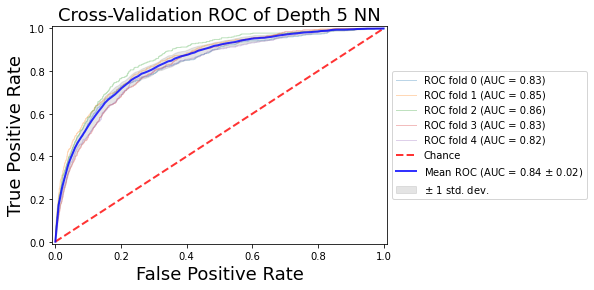

In [42]:
kfold = KFold(n_splits=5, shuffle=True)
inputs = x_d5.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = np.array(y_d5)
targets = np.array([np.array(xi) for xi in targets])

n_classes = 51

acc_per_fold = []
f1_per_fold = []
time_per_fold = []

acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    x_test_d5 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    
    ####################################################################################################
    #test MWPM decoder for this fold
    decoding_d5, time_mwpm = do_new_decoding(x_test_d5, 5, 0)
    decoding_d5['combine'] = decoding_d5[[0, 1]].values.tolist()
    decoding_d5['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d5 = np.array(decoding_d5[0])
                                              
    time_per_fold_mwpm.append(time_mwpm)
                                              
    pred_mwpm = mlb.transform(decoding_d5)
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets[test], pred_mwpm, mlb)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets[test], pred_mwpm, average='micro'))
    
    #####################################################################################################
    #test the plut decoder for this fold
    
    lookup_d5 = lookup_decoder(5)
    
    lookup_d5 = train_plut(lookup_d5, inputs_train, targets[train])
    
    start = time.time_ns()
    pred_plut_d5 = test_plut(lookup_d5, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_plut_d5)
    else:
        acc, contingency_plut = partial_accuracy_and_contingency(targets[test], pred_plut_d5, mlb)
        
    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1_score(targets[test], pred_plut_d5, average='micro'))

    #####################################################################################################
    #Test the NN decoder for this fold
    
    model_d5 = compile_FFNN_cv_model_DepthFive(5)
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    
    history = model_d5.fit(
    inputs_train,
    targets[train],
    validation_split=.25,
    epochs = 800)
    
   # Generate generalization metrics
    scores = model_d5.evaluate(inputs_test, targets[test], verbose=0)
    
    start = time.time_ns()
    predictions_d5 = model_d5.predict(inputs_test)
    end = time.time_ns() 
    time_per_fold.append((end - start)/ (10 ** 9))
    
    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d5.copy() #change here
    pred[pred>=.4]=1 
    pred[pred<.4]=0
    
    if fold_no < 5:
        acc = scores[1]
    else:
        acc, contingency_nn = partial_accuracy_and_contingency(targets[test], pred, mlb)

    acc_per_fold.append(acc)
    f1_per_fold.append(f1_score(targets[test], pred, average='micro'))

    
    # Increase fold number
    fold_no = fold_no + 1
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d5.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d5[:, i]) 
        aucs_classes[mlb.classes_[i]].append(auc(fpr[i], tpr[i]))
        
        
#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print("##############################################################################")
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print("##############################################################################")
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
print("##############################################################################")
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
    
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 5 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# D7 Training, Testing, and Cross-Validation

### Format data sets from CSV

#### Data sets for D7:
* Original:
    - "depth7_all_combos.csv"
* Randomly-sampled, with replacement (version 2):
    - "v2samples-d7-1000.csv"
    - "v2samples-d7-10000.csv"
    - "v2samples-d7-50000.csv"
* Randomly-sampled, without replacement (version 3):
    - "v3samples-d7-1000.csv"

In [ ]:
trainData_d7 = pd.read_csv("depth7_all_combos.csv")
trainData_d7 = trainData_d7.applymap(lambda x: add_noise(x,.01))

#These four lines remove duplicates
trainData_d7['Labels'] = trainData_d7['Labels'].map(lambda x: create_list_from_string(x))
trainData_d7['Labels'] = trainData_d7['Labels'].astype(str)
trainData_d7 = trainData_d7.drop_duplicates('Labels', keep='first', ignore_index=True)
trainData_d7['Labels'] = trainData_d7['Labels'].map(lambda x: create_list_from_string(x))

testData_d7_MWPM = graph_with_errs_d7(trainData_d7)

#transforms the data to encoding for ML
mlb_d7 = MultiLabelBinarizer()
mlb_d7.fit(trainData_d7['Labels'])
df = pd.DataFrame(mlb_d7.transform(trainData_d7['Labels']))
df['Labels']= df.values.tolist()
trainData_d7 = trainData_d7.drop(['Labels'], axis=1)
trainData_d7 = pd.concat([df["Labels"],testData_d7_MWPM, trainData_d7], axis=1, ignore_index=True)
trainData_d7.columns = ["Labels","XSyn", "ZSyn","X0", "Z1", "X2", "X3", "Z4", "X5", "X6", "Z7", "X8", "Z9", "Z10", "X11", "Z12", "X13", "Z14", "X15", "Z16", "Z17", "X18", "Z19","X20", "Z21", "X22", "Z23", "Z24", "X25", "Z26", "X27", "Z28", "X29", "Z30", "Z31", "X32", "Z33", "X34", "Z35", "X36", "Z37", "Z38", "X39", "X40", "Z41", "X42", "X43", "Z44", "X45", "X46", "Z47"]

y_d7 = trainData_d7["Labels"]
x_d7 = trainData_d7.drop(["Labels"], axis=1)

x_d7 = x_d7.replace([-1], 0)

### Fit model on training data

In [ ]:
inputs = x_d7.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d7.copy()
targets = np.array([np.array(xi) for xi in targets])

train_input_d7 = inputs[:,2:]
train_output_d7 = targets

x_train_d7, x_test_d7, Y_train_d7, Y_test_d7 = train_test_split(train_input_d7, train_output_d7, train_size=0.75, shuffle=True)

model_d7 = compile_FFNN_cv_model_DepthSeven(7)
print("Fit model on training data")
history = model_d7.fit(
    x=x_train_d7,
    y=Y_train_d7,
    validation_split=.25,
    epochs=150
)
model_d7.summary()

### Display Epoch vs. Loss plot

In [ ]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 7 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

### Display Epoch vs. Accuracy plot

In [ ]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 7 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

### Save model

In [ ]:
model_d7.save("model_d7.h5")

### K-fold cross validation

In [ ]:
kfold = KFold(n_splits=3, shuffle=True)
inputs = x_d7.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = np.array(y_d7)
targets = np.array([np.array(xi) for xi in targets])

n_classes = 99

acc_per_fold = []
f1_per_fold = []
time_per_fold = []

acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb_d7.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    t_test = targets[test].copy()
    x_test_d7 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    indices = np.random.choice(inputs[test].shape[0], 20000, replace=False)
    x_test_d7 = x_test_d7[indices]
    inputs_test_2 = inputs_test[indices]
    targets_test_2 = targets[test][indices]
    
    ####################################################################################################
    #test MWPM decoder for this fold
    
    decoding_d7, time_mwpm = do_new_decoding(x_test_d7, 7, 0)
    decoding_d7['combine'] = decoding_d7[[0, 1]].values.tolist()
    decoding_d7['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d7 = np.array(decoding_d7[0])
                                              
    time_per_fold_mwpm.append(time_mwpm)
                                              
    pred_mwpm = mlb_d7.transform(decoding_d7)

    if fold_no < 3:
        acc = partial_accuracy(targets_test_2, pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets_test_2, pred_mwpm, mlb_d7)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets_test_2, pred_mwpm, average='micro'))

    #####################################################################################################
    #test the plut decoder for this fold
    
    lookup_d7 = lookup_decoder(7)
    
    lookup_d7 = train_plut(lookup_d7, inputs_train, targets[train])
    
    start = time.time_ns()
    pred_plut_d7 = test_plut(lookup_d7, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 3:
        acc = partial_accuracy(targets[test], pred_plut_d7)
        f1 = f1_score(targets[test], pred_plut_d7, average='micro')
    else:
        pred_plut_d7 = test_plut(lookup_d7, inputs_test_2)
        f1 = f1_score(targets_test_2, pred_plut_d7, average='micro')
        acc, contingency_plut = partial_accuracy_and_contingency(targets_test_2, pred_plut_d7, mlb_d7)
        
    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1)
    
    #####################################################################################################
    #Test the NN decoder for this fold
    
    model_d7 = compile_FFNN_cv_model_DepthSeven(7)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model_d7.fit(
        x=inputs_train ,
        y=targets[train],
        validation_split=.25,
        epochs= 150)
    
   # Generate generalization metrics
    scores = model_d7.evaluate(inputs_test, targets[test], verbose=0)
    
    start = time.time_ns()
    predictions_d7 = model_d7.predict(inputs_test)
    end = time.time_ns() 
    time_per_fold.append((end - start)/ (10 ** 9))
    
    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d7.copy() #change here
    pred[pred>=.5]=1 
    pred[pred<.5]=0
     
    if fold_no < 3:
        acc = scores[1]
        f1 = f1_score(targets[test], pred, average='micro')
    else:
        pred = model_d7.predict(inputs_test_2)
        pred[pred>=.5]=1 
        pred[pred<.5]=0
        acc, contingency_nn = partial_accuracy_and_contingency(targets_test_2, pred, mlb_d7)
        f1 = f1_score(targets_test_2, pred, average='micro')
 
    acc_per_fold.append(acc)
    f1_per_fold.append(f1)

    # Increase fold number
    fold_no = fold_no + 1
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d7.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d7[:, i]) 
        aucs_classes[mlb_d7.classes_[i]].append(auc(fpr[i], tpr[i]))

#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d7.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 7 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## End